# Pentathlon: Next Product to Buy Models

* Team-lead GitHub userid: rsm-xyz123
* Group name: group 20
* Team member names:
    - Wenpu Zhang
    - Lynn Li
    - Jessie Chen
    - Ran Ji

## Setup

Please complete this python notebook with your group by answering the questions in `pentathlon-nptb.pdf`.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is a group assignment and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - model1.ipynb, question1.ipynb, etc.
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

## Case Questions

1. Perform the analysis following the instruction e-mailed by Anna to the analytics team (Step 1 to 8 above). Use logistic regression, neural networks, random forests, and XGBoost. Each ML model must be tuned using at least two hyper parameters (40 points)

![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## loading the data - this dataset must NOT be changed
pentathlon_nptb = pd.read_parquet("data/pentathlon_nptb.parquet")
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,2,0,0,2,2,0.0


In [3]:
# show dataset description
rsm.md("data/pentathlon_nptb_description.md")

## Pentathon: Next Product To Buy 

The available data is based on the last e-mail sent to each Pentathlon customer. Hence, an observation or row in the data is a "customer-promotional e-mail" pair. The data contains the following basic demographic information available to Pentathlon:

* "age": Customer age(coded in 4 buckets:"<30", "30 to 44", "45 to 59", and ">=60") 
* "female": Gender identity coded as Female "yes" or "no"
* "income": Income in Euros, rounded to the nearest EUR5,000
* "education": Percentage of college graduates in the customer's neighborhood, coded from 0-100
* "children": Average number of children in the customer's neighborhood

The data also contains basic historical information about customer purchases, specifically, a department-specific frequency measure.

* "freq_endurance-freq_racquet": Number of purchases in each department in the last year, excluding any purchase in response to the last email.

The key outcome variables are:

* "buyer": Did the customer click on the e-mail and complete a purchase within two days of receiving the e-mail ("yes" or "no")?
* "total_os": Total order size (in Euros) conditional on the customer having purchased (buyer == "yes"). This measures spending across all departments, not just the department that sent the message

> Note: In addition to the six message groups, a seventh group of customers received no promotional e-mails for the duration of the test ("control").

In [4]:
# show the content another notebook
rsm.md_notebook("./sub-notebooks/model1.ipynb")

```python
lrc = rsm.model.logistic(
    data={"pentathlon_nptb": pentathlon_nptb},
    rvar="buyer",
    lev="yes",
    evar=["message", "age"]
)
lrc.summary()
```

In [5]:
# run python code from another notebook
%run ./sub-notebooks/model1.ipynb

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                       OR     OR%  coefficient  std.error  z.value p.value     
Intercept           0.013  -98.7%        -4.34      0.034 -126.939  < .001  ***
message[control]    0.946   -5.4%        -0.06      0.032   -1.718   0.086    .
message[endurance]  1.109   10.9%         0.10      0.031    3.307  < .001  ***
message[racquet]    0.965   -3.5%        -0.04      0.032   -1.121   0.262     
message[strength]   1.063    6.3%         0.06      0.032    1.945   0.052    .
message[team]       1.024    2.4%         0.02      0.032    0.755    0.45     
message[water]      1.037    3.7%         0.04      0.032    1.146   0.252     
age[30 to 44]       2.421  142.1%         0.88      0.030   29.315  < .001  ***
age[45 to 59]       2.159  115.9% 

In [6]:
# importing functions from a module/package
from utils import functions

functions.example()



You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



## The Analysis  
After compiling the data, the digital marketing analytics team began to work through the instructions Anna had e-mailed them:  
“Please perform all estimation using the training sample. Use the test sample to assess model performance for the binary decision of whether a customer buys after receiving a particular message or no-message. Please use the following steps:

In [7]:
pentathlon_nptb_test = pentathlon_nptb.query("training == 0")
pentathlon_nptb_train = pentathlon_nptb.query("training == 1")

In [8]:
pentathlon_nptb_train.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
5,U28,no,0,strength,< 30,yes,25000,18,0.3,0,0,0,0,0,0,1.0
8,U59,no,0,strength,>= 60,yes,65000,36,1.2,1,1,0,2,0,3,1.0


In [9]:
pentathlon_nptb_train.value_counts("buyer")

buyer
no     409920
yes     10080
Name: count, dtype: int64

In [10]:
pentathlon_nptb.dtypes

custid                object
buyer               category
total_os               int32
message             category
age                 category
female              category
income                 int32
education              int32
children             float64
freq_endurance         int32
freq_strength          int32
freq_water             int32
freq_team              int32
freq_backcountry       int32
freq_racquet           int32
training             float64
dtype: object

In [11]:
evar = ['message','age', 'female', 'income', 
        'education', 'children','freq_endurance',
        'freq_strength', 'freq_water', 'freq_team',
        'freq_backcountry', 'freq_racquet'] 

In [12]:
ivar=[f"{e}:message" for e in evar if e != "message"]
ivar

['age:message',
 'female:message',
 'income:message',
 'education:message',
 'children:message',
 'freq_endurance:message',
 'freq_strength:message',
 'freq_water:message',
 'freq_team:message',
 'freq_backcountry:message',
 'freq_racquet:message']

In [13]:
lr = rsm.model.logistic(
    data={"pentathlon_nptb": pentathlon_nptb_train},
    rvar="buyer",
    evar = evar,
    ivar = ivar,
    lev="yes"
)
lr.summary()

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                                        OR      OR%  coefficient  std.error  z.value p.value     
Intercept                            0.000  -100.0%        -8.25      0.153  -53.948  < .001  ***
message[control]                     1.115    11.5%         0.11      0.220    0.496    0.62     
message[endurance]                   1.199    19.9%         0.18      0.213    0.850   0.395     
message[racquet]                     1.084     8.4%         0.08      0.217    0.370   0.711     
message[strength]                    0.959    -4.1%        -0.04      0.216   -0.195   0.846     
message[team]                        0.881 

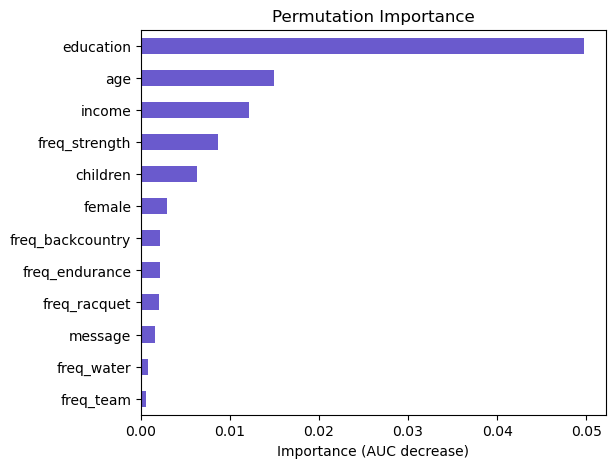

In [14]:
lr.plot("vimp")

In [15]:
pentathlon_nptb['pred_logit'] = lr.predict(pentathlon_nptb)['prediction']

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


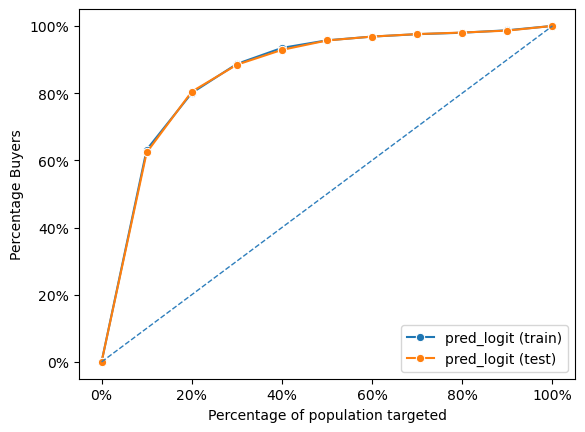

In [16]:
dct = {"train": pentathlon_nptb[pentathlon_nptb['training'] == 1], "test": pentathlon_nptb[pentathlon_nptb['training'] == 0]}

fig1 = rsm.gains_plot(dct, "buyer", "yes", "pred_logit")

In [165]:
from sklearn.metrics import roc_auc_score

# Extract the true labels and predicted probabilities from the test set
y_true = pentathlon_nptb[pentathlon_nptb['training'] == 0]['buyer']
y_pred = pentathlon_nptb[pentathlon_nptb['training'] == 0]['pred_logit']

# Calculate the AUC
auc_lr_test = roc_auc_score(y_true, y_pred)
print(f"AUC of the Logistic model in the test set: {auc_lr_test}")


AUC of the Logistic model in the test set: 0.8828396372771621


In [18]:
from sklearn.metrics import roc_auc_score

# Extract the true labels and predicted probabilities from the test set
y_true = pentathlon_nptb[pentathlon_nptb['training'] == 1]['buyer']
y_pred = pentathlon_nptb[pentathlon_nptb['training'] == 1]['pred_logit']

# Calculate the AUC
auc_lr_train = roc_auc_score(y_true, y_pred)
print(f"AUC of the organic model in the train set: {auc_lr_train}")


AUC of the organic model in the test set: 0.884078965780586


1. For **each customer** determine the message (i.e., endurance, strength, water, team, backcountry,  racquet, or no-message) predicted to lead to the highest **probability of purchase**. Describe your approach.

In [19]:
pentathlon_nptb_train.value_counts("message")

message
control        61217
team           60850
racquet        60772
backcountry    60425
water          59624
strength       59029
endurance      58083
Name: count, dtype: int64

In [20]:
pentathlon_nptb["p_control"] = lr.predict(pentathlon_nptb.assign(message="control"))["prediction"]
pentathlon_nptb["p_team"] = lr.predict(pentathlon_nptb.assign(message="team"))["prediction"]
pentathlon_nptb["p_racquet"] = lr.predict(pentathlon_nptb.assign(message="racquet"))["prediction"]
pentathlon_nptb["p_backcountry"] = lr.predict(pentathlon_nptb.assign(message="backcountry"))["prediction"]
pentathlon_nptb["p_water"] = lr.predict(pentathlon_nptb.assign(message="water"))["prediction"]
pentathlon_nptb["p_strength"] = lr.predict(pentathlon_nptb.assign(message="strength"))["prediction"]
pentathlon_nptb["p_endurance"] = lr.predict(pentathlon_nptb.assign(message="endurance"))["prediction"]

In [21]:
message_columns = ['p_control', 'p_team', 'p_racquet', 'p_backcountry', 'p_water', 'p_strength', 'p_endurance']

# Identify the message with the highest probability for each customer
pentathlon_nptb['best_message'] = pentathlon_nptb[message_columns].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb['best_message'] = pentathlon_nptb['best_message'].str.replace('p_', '')

pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,training,pred_logit,p_control,p_team,p_racquet,p_backcountry,p_water,p_strength,p_endurance,best_message
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1.0,0.012008,0.012022,0.012008,0.014499,0.011131,0.012604,0.015452,0.015682,endurance
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.0,0.005556,0.004605,0.005279,0.005858,0.005556,0.004981,0.005475,0.006014,endurance
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,1.0,0.013884,0.009140,0.009533,0.008789,0.010718,0.009680,0.009343,0.013884,endurance
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,1.0,0.002389,0.002252,0.002264,0.002089,0.002339,0.002389,0.002196,0.002970,endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.0,0.012039,0.010784,0.011119,0.012039,0.011526,0.011437,0.011463,0.019675,endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,1.0,0.002042,0.001966,0.001946,0.002118,0.001947,0.002042,0.002089,0.003217,endurance
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0.0,0.007692,0.006959,0.007692,0.008257,0.007884,0.005832,0.008117,0.007731,racquet
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,1.0,0.008225,0.008535,0.008225,0.008976,0.010062,0.008286,0.009822,0.011345,endurance
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0.0,0.006796,0.006378,0.006796,0.007352,0.007164,0.005272,0.007284,0.006971,racquet


__To determine the most effective promotional message for each customer, we adopted a predictive modeling approach using logistic regression. For each type of message (control, team, racquet, backcountry, water, strength, endurance), we temporarily assigned it to every customer in the dataset and predicted the probability of purchase. This process was repeated for each message category, resulting in a series of predicted probabilities for every customer. By comparing these probabilities, we identified the message leading to the highest likelihood of purchase for each individual. This tailored approach optimizes message selection to enhance customer response rates.__

**Our approach:**
1. Data Preparation: We divided our dataset into two parts: one for training our model (pentathlon_nptb_train) and the other for testing its predictions (pentathlon_nptb_test). This division was based on a 'training' flag within the data, ensuring that we could evaluate the model's performance on unseen data.
2. Variable Selection: We selected a range of explanatory variables (evar), encompassing both demographic information (such as age, gender, income, etc.) and variables indicating the frequency of the customer's participation in various sports activities. We also created interaction variables (ivar), which are combinations of the message types with the explanatory variables, to explore how different messages influence the probability of purchase in the context of the customer's characteristics and activity preferences.
3. Model Training: Using the training dataset, we trained a logistic regression model. This model aimed to predict the likelihood of a customer being a buyer (buyer) based on the explanatory and interaction variables. The logistic model allows us to estimate the probability of purchase in response to the different messages, taking into account the customer's profile.
4. Probability Prediction for Each Message: We extended the logistic model to predict the purchase probability for each type of message across all customers. This was achieved by assigning each message type in turn to the entire dataset (via the assign method) and then using the model to predict the purchase probability for each case. This step resulted in a set of predicted probabilities for each message type for every customer.
5. Identifying the Optimal Message: With the predicted probabilities for each message type in hand, we identified the optimal message for each customer. This was done by selecting the message associated with the highest probability of purchase. We compared the probabilities across all message types for each customer and selected the message that maximized this probability.
6. Finalization and Cleanup: After determining the optimal message for each customer, we finalized our dataset by cleaning up the column names. This involved replacing the prefix 'p_' used in the prediction columns with the actual message types to make the results more interpretable. This step made it clear which marketing message was predicted to be most effective for each customer based on their individual profile and preferences.

2. For each message, report the percentage of customers for whom that message or no-message maximizes their  **probability of purchase**. Comment on the distribution of expected response across messages.

In [22]:
pentathlon_nptb_test = pentathlon_nptb.query("training == 0")

In [23]:
# Create a crosstab to count the occurrences of each 'best_message'
message_crosstab = pd.crosstab(index=pentathlon_nptb_test['best_message'], columns='count')

# Calculate the percentage of customers for each message
message_crosstab['percentage'] = (message_crosstab['count'] / message_crosstab['count'].sum())

if 'control' not in message_crosstab.index:
    message_crosstab.loc['control'] = {'count': 0}
    message_crosstab.loc['control', 'percentage'] = 0

message_crosstab

col_0,count,percentage
best_message,,
backcountry,1447,0.008039
endurance,125861,0.699228
racquet,12299,0.068328
strength,36584,0.203244
team,1680,0.009333
water,2129,0.011828
control,0,0.000000


In [24]:
import matplotlib.pyplot as plt

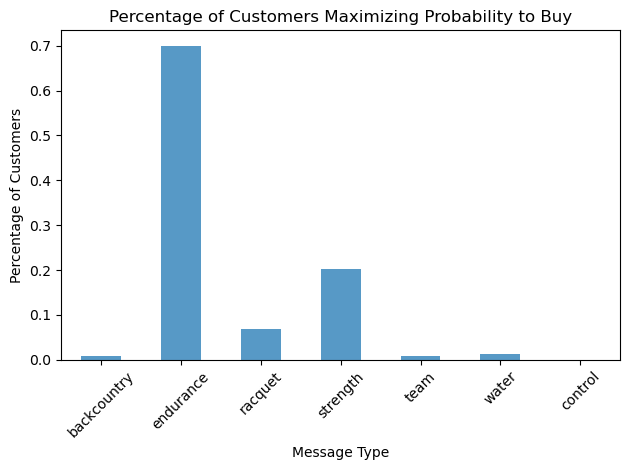

In [25]:
message_crosstab['percentage'].plot(kind='bar', alpha=0.75)

plt.title('Percentage of Customers Maximizing Probability to Buy')
plt.xlabel('Message Type')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

The bar chart displays the distribution of customers most likely to purchase according to the type of message they received. The message types are 'backcountry', 'endurance', 'racquet', 'strength', 'team', 'water', and 'control'.

From the chart, we can observe the following:

- The 'endurance' message appears to have had the highest expected response, with over 60% of customers indicating the highest probability to purchase when receiving this message.
- The 'strength' message also has a significant expected response, although it is substantially lower than 'endurance', suggesting that a moderate number of customers are influenced by messages related to strength activities.
- The 'team' message appears to have the third-highest expected response, followed by much smaller percentages for 'backcountry', 'racquet', and 'water'.
- The 'control' group, which presumably received no message or a neutral message, has the lowest expected response, indicating that specific messages tailored to customer interests are more likely to drive purchases than no message at all.
- This distribution suggests that customers are most responsive to messages that are likely aligned with their interests in endurance activities, which could include running, cycling, or swimming events. Marketers might consider focusing on endurance-related campaigns to maximize customer engagement and sales. However, it's also important to note that other factors could influence these results, such as the seasonality of sports, the presence of upcoming endurance-related events, or the demographic profile of the customer base.

3. For each customer, determine the message (i.e., endurance, strength, water, team, backcountry, racquet, or no-message) predicted to lead to the highest expected profit (COGS is 60%). Describe your approach to predict order size and how you calculated expected profit.

In [26]:
profit_margin = 0.4

No plot will be created for custid (type object)
No plot will be created for best_message (type object)


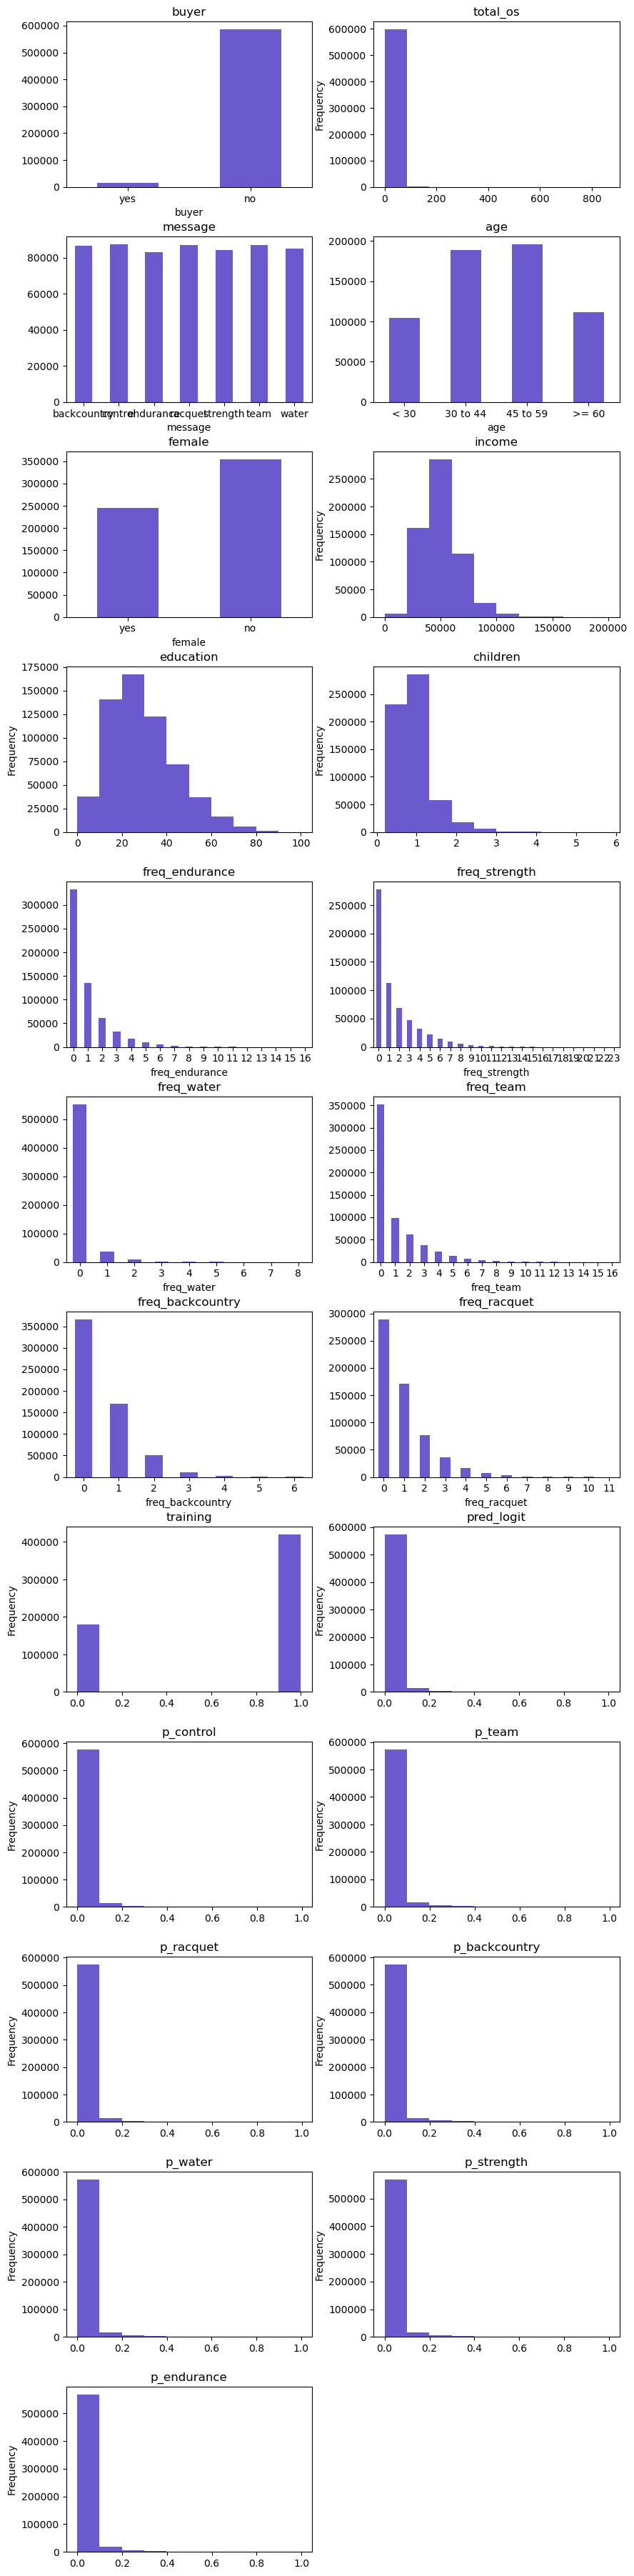

In [27]:
rsm.distr_plot(pentathlon_nptb)

In [28]:
pentathlon_nptb['ln_income'] = np.log(pentathlon_nptb['income']+ 1)
pentathlon_nptb['ln_education'] = np.log(pentathlon_nptb['education']+ 1)
pentathlon_nptb['ln_children'] = np.log(pentathlon_nptb['children'] + 1)
pentathlon_nptb['ln_freq_strength'] = np.log(pentathlon_nptb['freq_strength'] + 1)
pentathlon_nptb['ln_freq_water'] = np.log(pentathlon_nptb['freq_water']+ 1)
pentathlon_nptb['ln_freq_team'] = np.log(pentathlon_nptb['freq_team'] + 1)
pentathlon_nptb['ln_freq_backcountry'] = np.log(pentathlon_nptb['freq_backcountry']+ 1)
pentathlon_nptb['ln_freq_racquet'] = np.log(pentathlon_nptb['freq_racquet']+ 1)
pentathlon_nptb['ln_freq_endurance'] = np.log(pentathlon_nptb['freq_endurance']+ 1)


In [181]:
pentathlon_nptb['ln_total_os']= np.log(pentathlon_nptb['total_os'])

In [182]:
evar_linear = ['message', 'age', 'female' ,'ln_income', 'ln_education', 'ln_children', 'freq_endurance', 'freq_strength', 'freq_water', 'freq_team', 'freq_backcountry', 'freq_racquet']

In [183]:
ivar_linear=[f"{e}:message" for e in evar_linear if e != "message"]
ivar_linear

['age:message',
 'female:message',
 'ln_income:message',
 'ln_education:message',
 'ln_children:message',
 'freq_endurance:message',
 'freq_strength:message',
 'freq_water:message',
 'freq_team:message',
 'freq_backcountry:message',
 'freq_racquet:message']

In [32]:
pentathlon_nptb_yes = pentathlon_nptb.query("(buyer == 'yes') & (training == 1)")

In [33]:
nn1 = rsm.model.mlp(
    data={"pentathlon_nptb_yes": pentathlon_nptb_yes.query("training == 1")},
    rvar="ln_total_os",
    evar=evar_linear,
    hidden_layer_sizes=(1,),
    mod_type="regression"
)

nn1.summary()

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.0880934  -0.66443329  3.85072688 ...  0.0880934  -1.04069664
  1.59314679]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.08568956 -0.58584938  0.16391088 ... -0.83576947 -0.58584938
 -0.08600921]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.59353104

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb_yes
Response variable    : ln_total_os
Explanatory variables: message, age, female, ln_income, ln_education, ln_children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : regression
Nr. of features      : (12, 19)
Nr. of observations  : 10,080
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
Model fit            :
      n     r2    mse    mae
  10080  0.119  0.881  0.758

Raw data             :
    message      age female  ln_income  ln_education  ln_children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
  endurance 45 to 59     no  11.082158      3.970292     0.405465               3              0           0          2                 1       

In [34]:
# from sklearn.model_selection import GridSearchCV

# hls = [(5,5),(5,3),(4,2),(4,2,2),(5,),(2,2,4,3)]

# param_grid = {'hidden_layer_sizes': hls}
# scoring = {'r2': 'r2',
#            'mse': 'neg_mean_squared_error',
#            }

# nn1_cv = GridSearchCV(
#     nn1.fitted, param_grid, scoring=scoring, cv=5, n_jobs = 4, refit = 'r2', verbose = 5
# )

# nn1.data_onehot.mean().round(3)
# nn1_cv.fit(nn1.data_onehot, nn1.data.ln_total_os)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


KeyboardInterrupt: 

In [35]:
# nn1.data_onehot.head()
# pd.DataFrame(nn1_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_r2")

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [36]:
nn2 = rsm.model.mlp(
    data={"pentathlon_nptb_yes": pentathlon_nptb_yes.query("training == 1")},
    rvar="ln_total_os",
    evar=evar_linear,
    hidden_layer_sizes=(2,2,4,3),
    mod_type="regression"
)

nn2.summary()

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.0880934  -0.66443329  3.85072688 ...  0.0880934  -1.04069664
  1.59314679]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.08568956 -0.58584938  0.16391088 ... -0.83576947 -0.58584938
 -0.08600921]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.59353104

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb_yes
Response variable    : ln_total_os
Explanatory variables: message, age, female, ln_income, ln_education, ln_children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : regression
Nr. of features      : (12, 19)
Nr. of observations  : 10,080
Hidden_layer_sizes   : (2, 2, 4, 3)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
Model fit            :
      n     r2    mse   mae
  10080  0.149  0.851  0.74

Raw data             :
    message      age female  ln_income  ln_education  ln_children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
  endurance 45 to 59     no  11.082158      3.970292     0.405465               3              0           0          2                 1 

# We got r2 = 0.149 here. We want to use other model to check whether we can improve the r2 or not.

In [37]:
lr_int1 = rsm.model.regress(
    data={"pentathlon": pentathlon_nptb_yes.query("training == 1")},
    rvar="ln_total_os",
    evar= evar,
)
lr_int1.summary()

Linear regression (OLS)
Data                 : pentathlon
Response variable    : ln_total_os
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: the effect of x on ln_total_os is zero
Alt. hyp.: the effect of x on ln_total_os is not zero

                    coefficient  std.error  t.value p.value     
Intercept                 2.774      0.048   58.205  < .001  ***
message[control]         -0.227      0.030   -7.650  < .001  ***
message[endurance]       -0.106      0.029   -3.700  < .001  ***
message[racquet]         -0.076      0.029   -2.578    0.01   **
message[strength]        -0.123      0.029   -4.258  < .001  ***
message[team]            -0.082      0.029   -2.834   0.005   **
message[water]            0.009      0.029    0.307   0.759     
age[30 to 44]             0.098      0.028    3.460  < .001  ***
age[45 to 59]             0.087      0.029    3.008   0.00

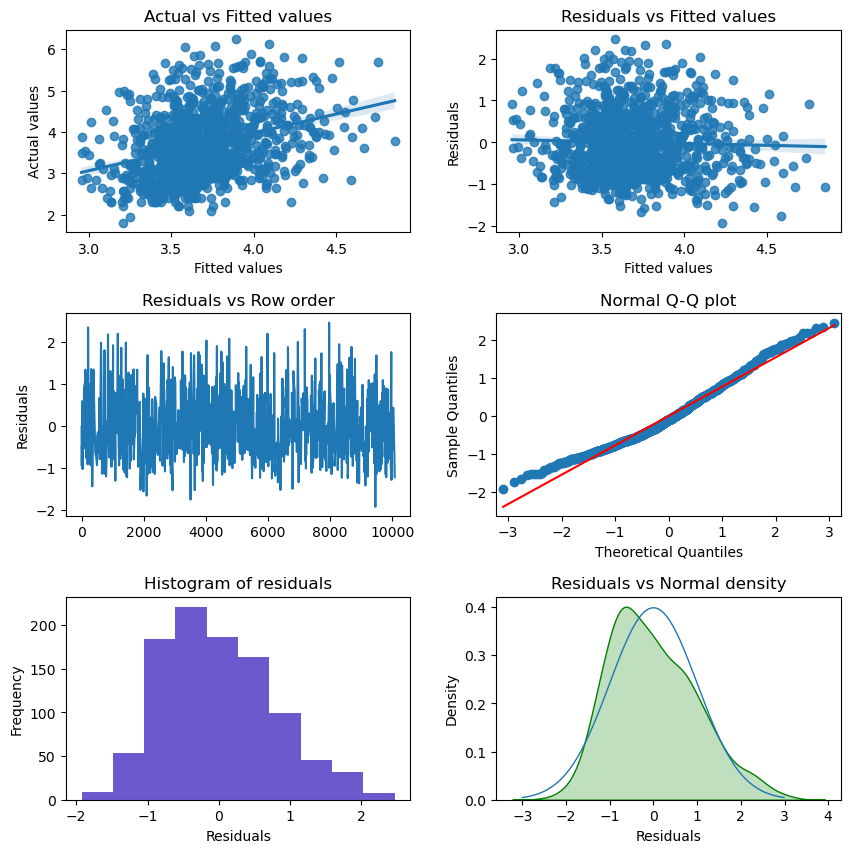

In [38]:
lr_int1.plot('dashboard')

## Let's see whether we can improve the residual plots or not.

In [39]:
lr_int2 = rsm.model.regress(
    data={"pentathlon": pentathlon_nptb_yes.query("training == 1")},
    rvar="ln_total_os",
    evar= evar_linear,
)
lr_int2.summary()

Linear regression (OLS)
Data                 : pentathlon
Response variable    : ln_total_os
Explanatory variables: message, age, female, ln_income, ln_education, ln_children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: the effect of x on ln_total_os is zero
Alt. hyp.: the effect of x on ln_total_os is not zero

                    coefficient  std.error  t.value p.value     
Intercept                -0.835      0.361   -2.313   0.021    *
message[control]         -0.230      0.030   -7.678  < .001  ***
message[endurance]       -0.107      0.029   -3.715  < .001  ***
message[racquet]         -0.082      0.030   -2.761   0.006   **
message[strength]        -0.125      0.029   -4.306  < .001  ***
message[team]            -0.084      0.029   -2.887   0.004   **
message[water]            0.006      0.029    0.201   0.841     
age[30 to 44]             0.080      0.028    2.808   0.005   **
age[45 to 59]             0.087      0.029    3.0

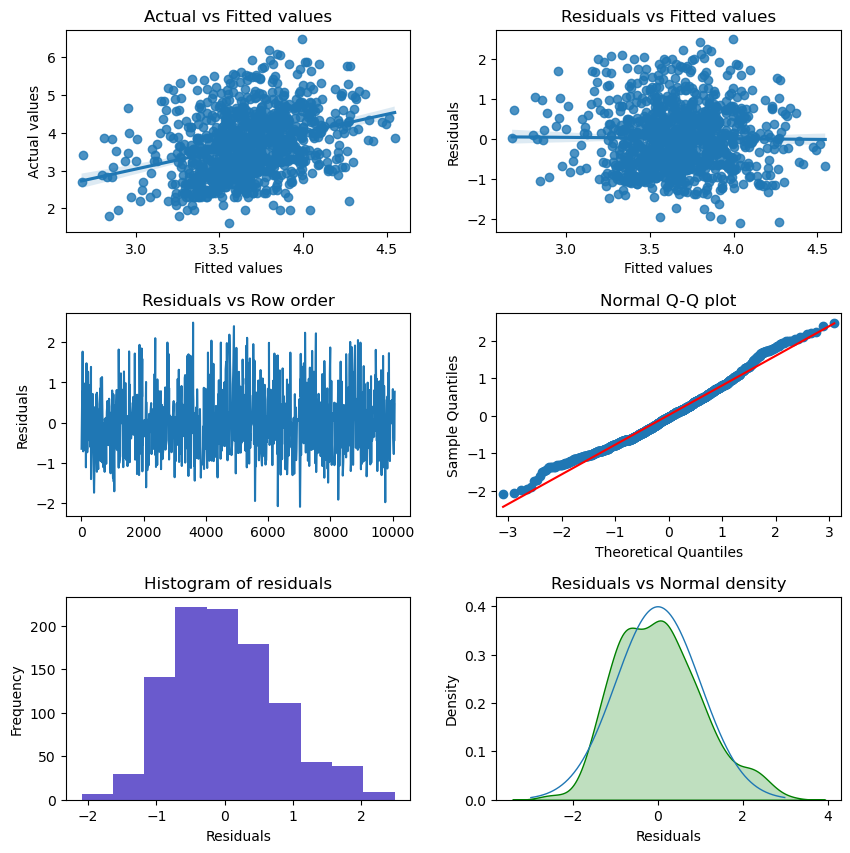

In [40]:
lr_int2.plot('dashboard')

In [41]:
pentathlon_nptb["order_size_control"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="control"))["prediction"])
pentathlon_nptb["order_size_team"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="team"))["prediction"])
pentathlon_nptb["order_size_racquet"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="racquet"))["prediction"])
pentathlon_nptb["order_size_backcountry"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="backcountry"))["prediction"])
pentathlon_nptb["order_size_water"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="water"))["prediction"])
pentathlon_nptb["order_size_strength"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="strength"))["prediction"])
pentathlon_nptb["order_size_endurance"] = np.exp(nn2.predict(pentathlon_nptb.assign(message="endurance"))["prediction"])

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.04069664 -1.04069664 -1.04069664 ... -1.04069664 -0.28816994
 -0.66443329]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.08600921 -1.08568956 -1.08568956 ...  0.16391088 -0.58584938
 -0.58584938]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.59353104

In [42]:
pentathlon_nptb['ep_control'] = pentathlon_nptb.order_size_control * profit_margin * pentathlon_nptb.p_control
pentathlon_nptb['ep_team'] = pentathlon_nptb.order_size_team * profit_margin * pentathlon_nptb.p_team
pentathlon_nptb['ep_racquet'] = pentathlon_nptb.order_size_racquet * profit_margin * pentathlon_nptb.p_racquet
pentathlon_nptb['ep_backcountry'] = pentathlon_nptb.order_size_backcountry * profit_margin * pentathlon_nptb.p_backcountry
pentathlon_nptb['ep_water'] =  pentathlon_nptb.order_size_water * profit_margin * pentathlon_nptb.p_water
pentathlon_nptb['ep_strength'] = pentathlon_nptb.order_size_strength * profit_margin * pentathlon_nptb.p_strength
pentathlon_nptb['ep_endurance'] = pentathlon_nptb.order_size_endurance * profit_margin * pentathlon_nptb.p_endurance

In [43]:
ordersize_columns = ['ep_control', 'ep_team', 'ep_racquet', 'ep_backcountry', 'ep_water', 'ep_strength', 'ep_endurance']

# Identify the message with the highest probability for each customer
pentathlon_nptb['most_profitable'] = pentathlon_nptb[ordersize_columns].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb['most_profitable'] = pentathlon_nptb['most_profitable'].str.replace('ep_', '')

pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,order_size_strength,order_size_endurance,ep_control,ep_team,ep_racquet,ep_backcountry,ep_water,ep_strength,ep_endurance,most_profitable
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,24.845478,24.841712,0.119713,0.119431,0.144093,0.110575,0.125139,0.153565,0.155830,endurance
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,25.862116,25.261065,0.047707,0.070813,0.061994,0.074745,0.066166,0.056635,0.060764,backcountry
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,45.498065,45.581325,0.166229,0.173183,0.159840,0.194762,0.175937,0.170038,0.253137,endurance
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,25.072061,24.975387,0.022585,0.023695,0.021022,0.024503,0.024963,0.022024,0.029671,endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,45.556224,38.464620,0.196200,0.202102,0.219487,0.209577,0.208032,0.208881,0.302711,endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,28.681830,26.327233,0.022515,0.029324,0.026300,0.029337,0.030763,0.023967,0.033878,endurance
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,25.887974,25.235080,0.072375,0.105557,0.087653,0.108121,0.078816,0.084052,0.078034,backcountry
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,24.951777,24.860912,0.085455,0.085488,0.089886,0.104337,0.085626,0.098028,0.112818,endurance
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,25.026546,24.902669,0.064020,0.071937,0.073931,0.075681,0.055427,0.072919,0.069434,backcountry


**Our Approach:**
1. Data Transformation: We started by transforming certain features in our dataset to their natural logarithm, which can help in normalizing the distribution of variables and improving the performance of the predictive models. This included taking the natural log of income, education, number of children, frequency of participation in different sports, and the total order size (referred to as ln_total_os).
2. Variable Selection for Order Size Prediction: We defined a list of explanatory variables that included customer demographics and the log-transformed frequency of sports activities. These variables, both raw and as interactions with the message type (evar_linear and ivar_linear), were prepared to be used in the model.
3. Initial Neural Network Model: We trained a simple neural network model (nn1) with a single hidden layer to predict the natural log of the order size (ln_total_os). This model was trained on customers who made a purchase and were part of the training set.
4. Complex Neural Network Model: We then trained a more complex neural network (nn2) with multiple hidden layers to predict ln_total_os. This model potentially captures more complex relationships in the data.
5. Linear Regression Attempt: We experimented with linear regression to predict ln_total_os. However, after evaluating the model summary, we found it to be less effective than the neural network approach.
6. Final Model Selection for Order Size: Given the inadequacy of linear regression, we decided to use the complex neural network model (nn2) to predict the order size for each message type. We assigned each message type to the dataset and predicted the order size, transforming the log predictions back to the original scale using the exponential function.
7. Expected Profit Calculation: We calculated the expected profit (ep_) for each message type by multiplying the predicted order size for that message by the profit margin (40%, given that COGS is 60%) and the predicted probability of purchase for that message. This gave us the expected profit for each message type for each customer.
8. Identifying Most Profitable Message: To determine the most profitable message for each customer, we identified the message type with the highest expected profit from the calculated values.
9. Cleanup and Finalization: We cleaned up the column names to only show the message types and removed the prefix ep_ to clearly present the most profitable message type for each customer.

This approach allowed us to estimate how much profit each message is expected to generate per customer, enabling us to tailor the marketing strategy effectively to maximize overall profit.

4. Report for each message, i.e., endurance, racket, etc., and no-message, the percentage of customers for whom that (no) message maximizes their expected profit. Comment on the distribution of **expected profit** across messages.

In [44]:
profit_crosstab = pd.crosstab(index=pentathlon_nptb.query('training == 0')['most_profitable'], columns='count')

# Calculate the percentage of customers for each message
profit_crosstab['percentage_profit'] = (profit_crosstab['count'] / profit_crosstab['count'].sum())

profit_crosstab

col_0,count,percentage_profit
most_profitable,,
backcountry,40359,0.224217
control,22,0.000122
endurance,73772,0.409844
racquet,13012,0.072289
strength,25040,0.139111
team,15367,0.085372
water,12428,0.069044


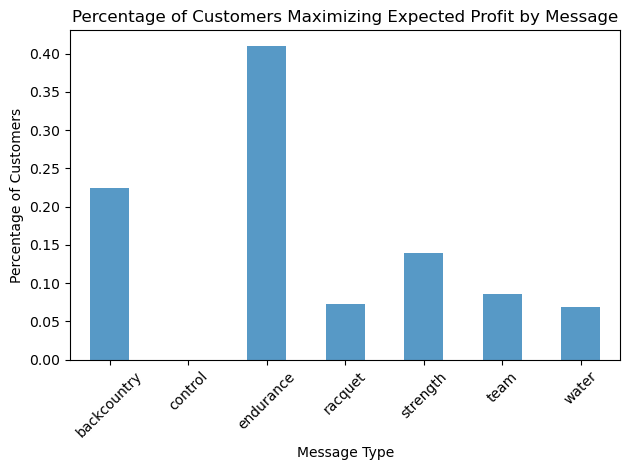

In [45]:
import matplotlib.pyplot as plt

profit_crosstab['percentage_profit'].plot(kind='bar', alpha=0.75)

plt.title('Percentage of Customers Maximizing Expected Profit by Message')
plt.xlabel('Message Type')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


**Description:**
- The 'endurance' message is clearly the most profitable, with around 40% of customers showing the highest expected profit when receiving this message. This indicates that the endurance message resonates well with customers, potentially leading to larger order sizes or a higher probability of purchase.
- The 'control' group, which could represent the absence of a targeted message or a standard message, has the second-highest expected profit. This suggests that even without targeted messaging, there is a baseline profitability among customers.
- Messages like 'racquet' and 'strength' show a moderate expected profit, which indicates that while less effective than 'endurance', these messages still have a significant impact on profit.
- The 'team', 'water', and 'backcountry' messages result in the lowest expected profit among the categories presented. This could imply that the customer base is less responsive to these types of messages or that these messages do not encourage as large of an order size as the 'endurance' message.
- Notably, the 'backcountry' message shows the lowest expected profit, suggesting that this particular message may not align well with the majority of the customer base or does not drive high-value purchases.

This distribution provides insights into which types of messages are most effective at driving profitable behavior among customers. The company could leverage this information to optimize their marketing strategy, focusing more on 'endurance' messages while potentially revising or reducing the emphasis on messages that are less profitable.

5. What expected profit can we obtain, on average, per customer if we customize the message to each customer? Include no-message as an option as well.

In [46]:
pentathlon_nptb['ep_max'] = pentathlon_nptb[ordersize_columns].max(axis=1)

profit_logit = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max"].agg("mean") #* len(pentathlon_nptb.query("training == 0"))
print(f"Expected profit from offer customization: ${profit_logit:,.2f}")


Expected profit from offer customization: $0.75


6. What is the expected profit per e-mailed customer if every customer receives the same message? Answer this question for each of the possible messages (i.e., endurance, strength, water, team, backcountry, racquet) and the no-message option. Comment on the distribution of expected profit across messages and the no-message option.

In [47]:
(
    pentathlon_nptb.loc[pentathlon_nptb.training == 0, ['ep_control', 'ep_team', 'ep_racquet', 'ep_backcountry', 'ep_water', 'ep_strength', 'ep_endurance']
]
    .agg("mean")
    .sort_values(ascending=False)
    .apply(rsm.format_nr, sym="$", dec=2)
)


ep_water          $0.51
ep_endurance       $0.5
ep_strength       $0.48
ep_backcountry    $0.45
ep_racquet        $0.43
ep_team           $0.42
ep_control        $0.33
dtype: object

The data presented in the image shows the expected profit (EP) for different message types, including the no-message control group. Here's an analysis of the expected profit for each message type:

- The 'water' message yields the highest expected profit at $0.51, indicating that this type of message effectively encourages profitable customer behavior.
- The 'endurance' message follows closely at $0.50, which aligns with previous data showing high effectiveness in influencing customer purchases.
- The 'strength' message also performs well, with an expected profit of $0.48.
- The 'backcountry', 'racquet', and 'team' messages offer a moderate level of expected profit, ranging from $0.45 to $0.42.
- The control group, representing the no-message option, results in the lowest expected profit at $0.33. This suggests that any targeted message tends to be more profitable than not sending a message at all.
- From this distribution, it's evident that targeted messaging generally leads to higher expected profits compared to the control group. The company can leverage this information to optimize their messaging strategy, potentially investing more in 'water' and 'endurance' themed communications, which seem to resonate best with customers in terms of profitability.

7. What is the expected profit per e-mailed customer if every customer is assigned randomly to one of the messages or the no-message condition?

In [48]:

np.random.seed(42)

messages = ['control', 'team', 'racquet', 'backcountry', 'water', 'strength', 'endurance']

probability_per_message = 1 / len(messages)

assigned_message = np.random.choice(messages, size=len(pentathlon_nptb), p=[probability_per_message] * len(messages))

pentathlon_nptb['assigned_message'] = assigned_message

average_profits = {}

for message in messages:

    assigned_users = pentathlon_nptb[pentathlon_nptb['assigned_message'] == message]
    

    ep_column = f'ep_{message}' if message != 'no_message' else 'ep_no_message'

    assigned_users_profit = assigned_users[ep_column]
    

    average_profits[message] = assigned_users_profit.mean()


for message, avg_profit in average_profits.items():
    print(f"The average expected profit for users assigned to '{message}' is: {avg_profit}")
    

random_profit = np.mean(list(average_profits.values()))
print(f"The overall average expected profit per user is: {random_profit}")

The average expected profit for users assigned to 'control' is: 0.33583185342961835
The average expected profit for users assigned to 'team' is: 0.42834247957992344
The average expected profit for users assigned to 'racquet' is: 0.41790535272544993
The average expected profit for users assigned to 'backcountry' is: 0.44915275396439863
The average expected profit for users assigned to 'water' is: 0.5041460934736813
The average expected profit for users assigned to 'strength' is: 0.49664354494573726
The average expected profit for users assigned to 'endurance' is: 0.48673162473803966
The overall average expected profit per user is: 0.4455362432652641


**description:**
1. Set Random Seed: The random seed is set to 42 to ensure reproducibility of the results.
2. Define Messages: A list of message types is created including 'control', 'team', 'racquet', 'backcountry', 'water', 'strength', and 'endurance'.
3. Calculate Probability: The probability of being assigned to each message is calculated as an equal chance distribution since there are seven messages.
4. Assign Messages: Each user in the pentathlon_nptb dataset is randomly assigned one of the messages using the calculated probability.
5. Add Assigned Message to Data: The assigned message for each user is added to the pentathlon_nptb dataset under the column assigned_message.
6. Initialize Dictionary for Profits: An empty dictionary average_profits is created to store the average profits for each message.
7. Calculate Average Profits:
- For each message type, the subset of users who were assigned that message is identified.
- The expected profit column corresponding to the message is selected. For messages other than 'no_message', the column name is constructed by appending ep_ to the message name.
- The mean of the expected profit for the assigned users is calculated and stored in the average_profits dictionary.
8. Print Average Profits: The average expected profit for each message is printed out.
9. Calculate Overall Average Profit: The overall average expected profit per user is calculated by taking the mean of the average profits for all messages and printed out.

8. For the typical promotional e-mail blast to 5,000,000 customers, what improvement (in percent and in total Euros) could Pentathlon achieve by customizing the message (or nomessage) to each customer. Compare the performance predictions from this personalized approach to scenarios where (1) each customer is sent the same message selected based on average performance, (2) a random message assignment approach is used (i.e., the status quo), and (3) no message is sent (i.e., the control condition)?

In [49]:
# Assuming pentathlon_nptb is your DataFrame with all the expected profits for each message and no message
all_customer = 5000000

total_customized_profit = profit_logit * all_customer
# 1. Same messages
average_profits = pentathlon_nptb[['ep_control', 'ep_endurance', 'ep_racquet', 'ep_strength', 'ep_team', 'ep_water']].mean()
best_message_profit = average_profits.max()
total_best_message_profit = best_message_profit * all_customer

# 2. Random Message Assignment Approach
total_random_profit = random_profit * all_customer

# 3. No Message (Control) Approach
total_no_message_profit = pentathlon_nptb['ep_control'].sum()

# Now calculate the improvement in percent and in total Euros
improvement_customized_vs_best = (total_customized_profit - total_best_message_profit) / total_best_message_profit * 100
improvement_customized_vs_random = (total_customized_profit - total_random_profit) / total_random_profit * 100
improvement_customized_vs_no_message = (total_customized_profit - total_no_message_profit) / total_no_message_profit * 100

improvement_euros_customized_vs_best = total_customized_profit - total_best_message_profit
improvement_euros_customized_vs_random = total_customized_profit - total_random_profit
improvement_euros_customized_vs_no_message = total_customized_profit - total_no_message_profit

# Print out the results
print(f"Improvement over best message approach: {improvement_customized_vs_best}% and {improvement_euros_customized_vs_best} Euros")
print(f"Improvement over random message approach: {improvement_customized_vs_random}% and {improvement_euros_customized_vs_random} Euros")
print(f"Improvement over no message approach: {improvement_customized_vs_no_message}% and {improvement_euros_customized_vs_no_message} Euros")


Improvement over best message approach: 50.29697480790581% and 1252124.7595251938 Euros
Improvement over random message approach: 67.95886651491043% and 1513906.904180937 Euros
Improvement over no message approach: 1790.1331413906998% and 3543634.439966303 Euros


**description:**

1. Initialize Total Customer Base: The total number of customers (all_customer) is set to 5,000,000.
2. Calculate Total Profit for Customized Approach: The variable profit_logit (which is not shown in the snippet but is presumably calculated earlier in the code as the profit from the logistic regression model) is multiplied by the total number of customers to get the total expected profit from a customized messaging approach.
3. Calculate Profit for Same Message Strategy: The code computes the average expected profits for each message type from the pentathlon_nptb DataFrame and identifies the highest average expected profit (best_message_profit). This value is then multiplied by the total number of customers to estimate the total profit if the best single message were used for all customers.
4. Calculate Profit for Random Message Assignment: The total profit for randomly assigning messages is calculated by multiplying the average expected profit per user from the random assignment (random_profit) by the total number of customers.
5. Calculate Profit for No Message (Control) Approach: The sum of the 'ep_control' column from the pentathlon_nptb DataFrame gives the total expected profit if no message were sent to any customer.
6. Calculate Improvement Percentages and Differences in Euros: The code calculates the percentage and total Euro improvement of the customized message approach over the best message, random message, and no message strategies.
7. Output the Results: Finally, the script prints out the improvement percentages and the financial improvement in Euros for the customized approach over each of the three other strategies.

## Neural Network

In [50]:
pentathlon_nptb_nn = pd.read_parquet("data/pentathlon_nptb.parquet")
pentathlon_nptb_nn.head()

pentathlon_nptb_nn_test = pentathlon_nptb_nn.query("training == 0")
pentathlon_nptb_nn_train = pentathlon_nptb_nn.query("training == 1")

In [51]:
pentathlon_nptb_nn['buyer_yes'] = np.where(pentathlon_nptb_nn['buyer'] == 'yes', 1, 0)
pentathlon_nptb_nn

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training,buyer_yes
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0,0
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0,0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0,0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0,0
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,2,0,0,2,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,0,0,0,0,0,1.0,0
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,1,0,0,0,1,0.0,0
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,5,0,2,1,2,1.0,0
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,2,0,0,0,1,0.0,0


In [52]:
evar_nn = ['message','age', 'female', 'income', 
        'education', 'children','freq_endurance',
        'freq_strength', 'freq_water', 'freq_team',
        'freq_backcountry', 'freq_racquet'] 

In [53]:
nn1 = rsm.model.mlp(
    data = {"pentathlon_nptb_nn": pentathlon_nptb_nn_train},
    rvar = "buyer", lev = "yes",
    evar = evar_nn,
    hidden_layer_sizes = (1,),
    mod_type = "classification"
)

nn1.summary()

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.38865487 -0.18405245 -1.32946709 ...  0.96136219 -0.47040611
  0.38865487]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.66371288  0.279378   -0.32689471 ...  0.0772871  -0.19216744
  0.21201437]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.64033622

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb_nn
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 19)
Nr. of observations  : 420,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.884

Raw data             :
  message      age female  income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
     team 30 to 44     no   55000         19       0.8               0              4           0          4                 0             1
endurance 45 to 59    yes   45000         33      

In [54]:
## GridSearchCV

##from sklearn.model_selection import GridSearchCV

#hls = [(10,5),(10,10),(20,20),(15,10,5),(5,5,5,),(2,2,4,3)]

#param_grid = {'hidden_layer_sizes': hls}
#scoring = {'AUC': 'roc_auc'}

#nn1_cv = GridSearchCV(
#    nn1.fitted, param_grid, scoring=scoring, cv=5, n_jobs = 4, refit = 'AUC', verbose = 5
#)

#nn1.data_onehot.mean().round(3)
#nn1_cv.fit(nn1.data_onehot, nn1.data.buyer)


In [55]:
#nn1.data_onehot.head()
#pd.DataFrame(nn1_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")

In [56]:
nn2 = rsm.model.mlp(
    data = {"pentathlon_nptb_nn": pentathlon_nptb_nn_train},
    rvar = "buyer", lev = "yes",
    evar = evar_nn,
    hidden_layer_sizes = (5,5,5),
    mod_type = "classification"
)

nn2.summary()

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.38865487 -0.18405245 -1.32946709 ...  0.96136219 -0.47040611
  0.38865487]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.66371288  0.279378   -0.32689471 ...  0.0772871  -0.19216744
  0.21201437]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.64033622

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb_nn
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 19)
Nr. of observations  : 420,000
Hidden_layer_sizes   : (5, 5, 5)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.891

Raw data             :
  message      age female  income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
     team 30 to 44     no   55000         19       0.8               0              4           0          4                 0             1
endurance 45 to 59    yes   45000         33 

In [57]:
pentathlon_nptb_nn['pred_nn1'] = nn1.predict(pentathlon_nptb_nn)['prediction']
pentathlon_nptb_nn['pred_nn2'] = nn2.predict(pentathlon_nptb_nn)['prediction']

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.38865487 -0.75675977 -0.18405245 ...  0.38865487  0.10230121
  0.10230121]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.66371288 -0.46162197  0.279378   ...  0.21201437  0.41410527
 -0.25953107]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.64033622

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


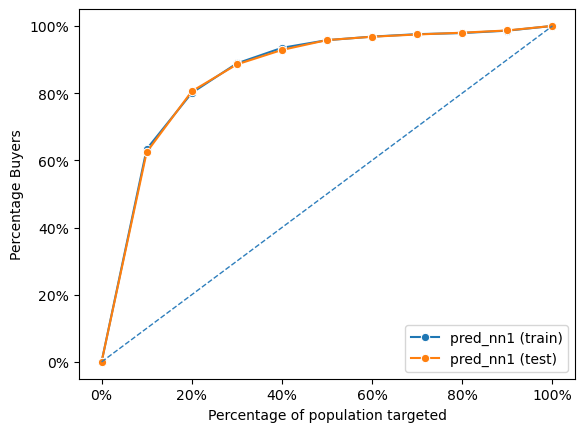

In [58]:
## gain chart
dct = {"train": pentathlon_nptb_nn[pentathlon_nptb_nn['training'] == 1], "test": pentathlon_nptb_nn[pentathlon_nptb_nn['training'] == 0]}
fig1 = rsm.gains_plot(dct, "buyer", "yes", "pred_nn1")

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


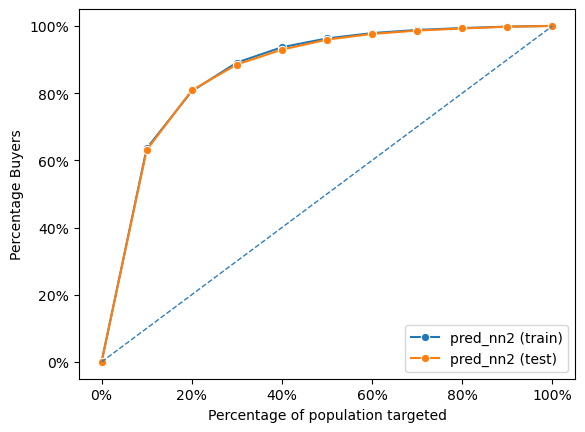

In [59]:
dct = {"train": pentathlon_nptb_nn[pentathlon_nptb_nn['training'] == 1], "test": pentathlon_nptb_nn[pentathlon_nptb_nn['training'] == 0]}
fig1 = rsm.gains_plot(dct, "buyer", "yes", "pred_nn2")

## **We got 0.891 for nn2 and the gains plot shows the model is not overfitting which means nn2 performs well. So we decided to use nn2 to predict the expected profit.**

In [152]:
# Extract the true labels and predicted probabilities from the test set
y_true = pentathlon_nptb_nn[pentathlon_nptb_nn['training'] == 0]['buyer']
y_pred = pentathlon_nptb_nn[pentathlon_nptb_nn['training'] == 0]['pred_nn2']

# Calculate the AUC
auc_nn_test = roc_auc_score(y_true, y_pred)
print(f"AUC of the Neural network model in the test set: {auc_nn_test}")


AUC of the Neural network model in the test set: 0.8889168180625127


In [153]:
y_true = pentathlon_nptb_nn[pentathlon_nptb_nn['training'] == 1]['buyer']
y_pred = pentathlon_nptb_nn[pentathlon_nptb_nn['training'] == 1]['pred_nn2']

# Calculate the AUC
auc_nn_train = roc_auc_score(y_true, y_pred)
print(f"AUC of the Neural network model in the train set: {auc_nn_train}")

AUC of the Neural network model in the train set: 0.8912208393788412


1. For **each customer** determine the message (i.e., endurance, strength, water, team, backcountry,  racquet, or no-message) predicted to lead to the highest **probability of purchase**. Describe your approach.

In [60]:
messages = ["control", "team", "racquet", "backcountry", "water", "strength", "endurance"]

for message in messages:
    column_name = f"p_{message}"  
    pentathlon_nptb_nn[column_name] = nn2.predict(pentathlon_nptb_nn.assign(message=message))["prediction"]
    
pentathlon_nptb_nn


/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.38865487 -0.75675977 -0.18405245 ...  0.38865487  0.10230121
  0.10230121]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.66371288 -0.46162197  0.279378   ...  0.21201437  0.41410527
 -0.25953107]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.64033622

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,buyer_yes,pred_nn1,pred_nn2,p_control,p_team,p_racquet,p_backcountry,p_water,p_strength,p_endurance
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,0,0.012438,0.013915,0.011385,0.013915,0.011903,0.013169,0.013615,0.014373,0.012129
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0,0.003623,0.001850,0.001731,0.001992,0.001504,0.001850,0.001989,0.001927,0.001868
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,0,0.009892,0.007574,0.006412,0.007538,0.006769,0.007277,0.007132,0.007978,0.007574
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,0,0.001449,0.000763,0.000780,0.000761,0.000733,0.000726,0.000763,0.000970,0.002447
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0,0.010817,0.008885,0.007242,0.009111,0.008885,0.008616,0.007919,0.008407,0.006131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,0,0.001358,0.001414,0.001501,0.001400,0.001354,0.001286,0.001414,0.002194,0.005768
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0,0.005533,0.004399,0.003521,0.004399,0.004024,0.004171,0.003632,0.003901,0.003196
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,0,0.007333,0.002652,0.002137,0.002652,0.002579,0.002663,0.002321,0.002315,0.001812
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0,0.004790,0.003227,0.002597,0.003227,0.002833,0.003122,0.002732,0.002848,0.002226


In [61]:
message_columns = ['p_control', 'p_team', 'p_racquet', 'p_backcountry', 'p_water', 'p_strength', 'p_endurance']

# Identify the message with the highest probability for each customer
pentathlon_nptb_nn['best_message'] = pentathlon_nptb_nn[message_columns].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb_nn['best_message'] = pentathlon_nptb_nn['best_message'].str.replace('p_', '')

pentathlon_nptb_nn

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_nn1,pred_nn2,p_control,p_team,p_racquet,p_backcountry,p_water,p_strength,p_endurance,best_message
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,0.012438,0.013915,0.011385,0.013915,0.011903,0.013169,0.013615,0.014373,0.012129,strength
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.003623,0.001850,0.001731,0.001992,0.001504,0.001850,0.001989,0.001927,0.001868,team
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,0.009892,0.007574,0.006412,0.007538,0.006769,0.007277,0.007132,0.007978,0.007574,strength
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,0.001449,0.000763,0.000780,0.000761,0.000733,0.000726,0.000763,0.000970,0.002447,endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.010817,0.008885,0.007242,0.009111,0.008885,0.008616,0.007919,0.008407,0.006131,team
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,0.001358,0.001414,0.001501,0.001400,0.001354,0.001286,0.001414,0.002194,0.005768,endurance
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0.005533,0.004399,0.003521,0.004399,0.004024,0.004171,0.003632,0.003901,0.003196,team
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,0.007333,0.002652,0.002137,0.002652,0.002579,0.002663,0.002321,0.002315,0.001812,backcountry
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0.004790,0.003227,0.002597,0.003227,0.002833,0.003122,0.002732,0.002848,0.002226,team


Message Categories Definition: I started by listing all possible marketing messages, including "control" (which might imply no specific marketing message or a baseline comparison), "team", "racquet", "backcountry", "water", "strength", and "endurance". Each message represents a unique marketing angle or theme.

Purchase Probability Prediction: For each customer in my dataset (pentathlon_nptb_nn), I predicted the probability of making a purchase if they were sent each of the listed marketing messages. I achieved this by iterating over each message, constructing a corresponding column name for that message's predicted probability (e.g., p_team for the "team" message), and then using the nn2.predict function. This function was applied to the dataset with the current message appended to it, and the predictions were stored in the newly created columns.

Compilation of Predictions: After completing the predictions for each message, my dataset expanded to include new columns. Each column represented the predicted probability of a customer making a purchase in response to a specific message.

Best Message Identification for Each Customer: With all probabilities calculated, my next step was to identify which marketing message was most likely to encourage a purchase for each customer. I did this by comparing the probabilities across the newly added columns for each customer and selecting the message associated with the highest probability. The name of this message was then stored in a new column called best_message.

Column Name Simplification: To make the outcome more straightforward to interpret, I refined the best_message column by stripping the p_ prefix from the values, leaving only the essence of the message (e.g., "team" or "racquet"). This simplified representation directly indicates the most effective marketing message for each customer, based on the model's predictions.

2. For each message, report the percentage of customers for whom that message or no-message maximizes their  **probability of purchase**. Comment on the distribution of expected response across messages.

In [62]:
pentathlon_nptb_nn_test = pentathlon_nptb_nn.query("training == 0")

In [63]:
# Create a crosstab to count the occurrences of each 'best_message'
message_crosstab = pd.crosstab(index=pentathlon_nptb_nn_test['best_message'], columns='count')

# Calculate the percentage of customers for each message
message_crosstab['percentage'] = (message_crosstab['count'] / message_crosstab['count'].sum())

message_crosstab

col_0,count,percentage
best_message,,
backcountry,1000,0.005556
endurance,110624,0.614578
racquet,66,0.000367
strength,26837,0.149094
team,41204,0.228911
water,269,0.001494


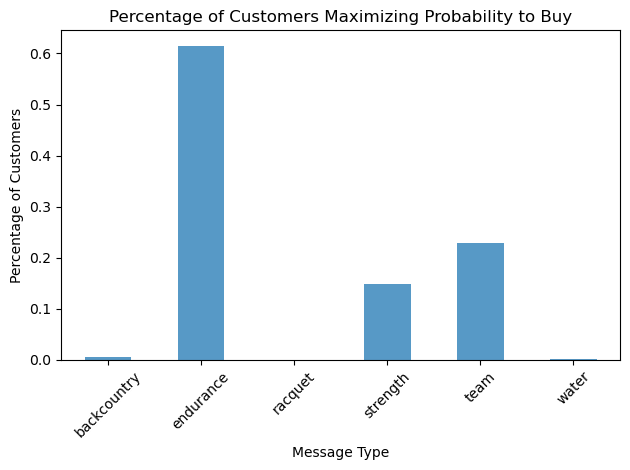

In [64]:
message_crosstab['percentage'].plot(kind='bar', alpha=0.75)

plt.title('Percentage of Customers Maximizing Probability to Buy')
plt.xlabel('Message Type')
plt.ylabel('Percentage of Customers')

plt.xticks(rotation=45) 

plt.tight_layout() 

plt.show()


In our recent analysis of customer data, we discovered that the 'endurance' marketing message is predicted to be the most effective, with it being the leading message for 61.46% of our customers. The messages themed around 'strength' and 'team' are also impactful, being the best messages for 14.91% and 22.89% of our customer base, respectively. On the other hand, the 'backcountry', 'racquet', and 'water' messages resonate with a smaller percentage of our customers, which suggests that these messages may be suited for more specific segments rather than the general population.

These insights suggest a strong preference among our customers for themes that convey perseverance and robustness, with 'endurance' standing out as the key driver of potential purchases. However, the significant percentages for 'strength' and 'team' also highlight the importance of diversity in our messaging strategy, as different customers respond to different themes.

It is important for us to note that these results are based on predictions from our model and should be validated through practical market tests to ensure their accuracy and effectiveness. Such validation would help us to refine our marketing approach, ensuring that we are engaging with our customers in the most compelling way possible.

3. For each customer, determine the message (i.e., endurance, strength, water, team, backcountry, racquet, or no-message) predicted to lead to the highest expected profit (COGS is 60%). Describe your approach to predict order size and how you calculated expected profit.

In [65]:
# Define the columns on which you want to apply the log transformation
columns_to_log_transform = [
    'income', 'education', 'children',
    'freq_strength', 'freq_water', 'freq_team',
    'freq_backcountry', 'freq_racquet', 'freq_endurance', 'total_os'
]

# Apply log transformation using a for loop
for column in columns_to_log_transform:
    pentathlon_nptb_nn[f'ln_{column}'] = np.log(pentathlon_nptb_nn[column] + 1)


In [66]:
evar_linear = ['message', 'age', 'female' ,'ln_income', 'ln_education', 'ln_children', 'freq_endurance', 'freq_strength', 'freq_water', 'freq_team', 'freq_backcountry', 'freq_racquet']

In [67]:
pentathlon_nptb_yes = pentathlon_nptb_nn.query("(buyer == 'yes') & (training == 1)")

In [68]:
nn_oz = rsm.model.mlp(
    data={"pentathlon_nptb_yes": pentathlon_nptb_yes.query("training == 1")},
    rvar="ln_total_os",
    evar=evar_linear,
    hidden_layer_sizes=(2,2,4,3),
    mod_type="regression"
)

nn_oz.summary()

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.0880934  -0.66443329  3.85072688 ...  0.0880934  -1.04069664
  1.59314679]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.08568956 -0.58584938  0.16391088 ... -0.83576947 -0.58584938
 -0.08600921]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.59353104

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb_yes
Response variable    : ln_total_os
Explanatory variables: message, age, female, ln_income, ln_education, ln_children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : regression
Nr. of features      : (12, 19)
Nr. of observations  : 10,080
Hidden_layer_sizes   : (2, 2, 4, 3)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
Model fit            :
      n     r2    mse    mae
  10080  0.156  0.844  0.736

Raw data             :
    message      age female  ln_income  ln_education  ln_children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
  endurance 45 to 59     no  11.082158      3.970292     0.405465               3              0           0          2                 

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [69]:
# Define the message types to iterate over
messages = ["control", "team", "racquet", "backcountry", "water", "strength", "endurance"]

# Loop over each message, predict and store the exponentiated results
for message in messages:
    column_name = f"order_size_{message}"
    predictions = nn2.predict(pentathlon_nptb_nn.assign(message=message))["prediction"]
    pentathlon_nptb_nn[column_name] = np.exp(predictions)
    

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.38865487 -0.75675977 -0.18405245 ...  0.38865487  0.10230121
  0.10230121]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.66371288 -0.46162197  0.279378   ...  0.21201437  0.41410527
 -0.25953107]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.64033622

In [70]:
# Define the message types to iterate over
message_types = ["control", "team", "racquet", "backcountry", "water", "strength", "endurance"]

# Loop over each message type and calculate the expected profit
for message_type in message_types:
    order_size_column = f"order_size_{message_type}"
    p_column = f"p_{message_type}"
    ep_column = f"ep_{message_type}"
    
    pentathlon_nptb_nn[ep_column] = pentathlon_nptb_nn[order_size_column] * 0.4 * pentathlon_nptb_nn[p_column]


In [71]:
ordersize_columns = ['ep_control', 'ep_team', 'ep_racquet', 'ep_backcountry', 'ep_water', 'ep_strength', 'ep_endurance']

# Identify the message with the highest probability for each customer
pentathlon_nptb_nn['most_profitable'] = pentathlon_nptb_nn[ordersize_columns].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb_nn['most_profitable'] = pentathlon_nptb_nn['most_profitable'].str.replace('ep_', '')

pentathlon_nptb_nn

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,order_size_strength,order_size_endurance,ep_control,ep_team,ep_racquet,ep_backcountry,ep_water,ep_strength,ep_endurance,most_profitable
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1.014477,1.012203,0.004606,0.005644,0.004818,0.005337,0.005521,0.005833,0.004911,strength
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,1.001929,1.001870,0.000694,0.000798,0.000602,0.000741,0.000797,0.000772,0.000749,team
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,1.008010,1.007602,0.002581,0.003038,0.002726,0.002932,0.002873,0.003217,0.003052,strength
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,1.000971,1.002450,0.000312,0.000305,0.000294,0.000290,0.000305,0.000388,0.000981,endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,1.008442,1.006150,0.002918,0.003678,0.003586,0.003476,0.003193,0.003391,0.002468,team
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,1.002196,1.005785,0.000601,0.000561,0.000542,0.000515,0.000567,0.000880,0.002321,endurance
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,1.003909,1.003201,0.001413,0.001767,0.001616,0.001675,0.001458,0.001566,0.001282,team
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,1.002317,1.001813,0.000857,0.001064,0.001034,0.001068,0.000931,0.000928,0.000726,backcountry
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,1.002852,1.002228,0.001041,0.001295,0.001137,0.001253,0.001096,0.001143,0.000892,team


To determine the most profitable message for each customer, we first used a multi-layer perceptron regression model to predict the log-transformed order size, given various customer features and message types. Here is the approach we followed:

1. Data Preparation: We applied a log transformation to certain features of our dataset to normalize their distribution, which can help improve model performance. The features transformed included customer income, education, number of children, frequency of response to previous messages, and total order size.

2. Model Training: We trained a neural network model (`nn_oz`) on customers who have made a purchase (`buyer == 'yes'`) and were part of the training set (`training == 1`). The model used the log-transformed total order size as the response variable and included customer demographics, log-transformed features, and frequency of responses to various messages as explanatory variables.

3. Order Size Prediction: With the trained model, we predicted the order size for each customer and each type of message by iterating over the list of messages. We used the `nn2.predict` function (which seems to be another neural network model, not the `nn_oz` model from the summary) to make predictions based on the message type. These predictions were exponentiated to revert them from the log scale to the original scale, yielding the predicted order sizes.

4. Expected Profit Calculation: We calculated the expected profit by taking 40% of the predicted order size (since COGS is 60%, the profit margin is 40%) and multiplying it by the probability of purchase for each message type. This calculation was done for each message type, generating an expected profit for each.

5. Profitability Analysis: To identify the most profitable message for each customer, we compared the expected profits across all message types and selected the message that yielded the highest expected profit. The column name of the message with the highest expected profit was stored in a new column named `most_profitable`.

6. Result Cleanup: We cleaned the `most_profitable` column by removing the `ep_` prefix to simplify the message types, making the results clear and interpretable.

7. Final Output: Our dataset now includes a column identifying the most profitable message to send to each customer, which is essential for optimizing marketing strategies and maximizing profit.

The code snippet provided outlines the steps we implemented, and the logic we applied ensures that we not only consider the likelihood of a customer making a purchase but also the value of the purchase itself. This two-fold approach helps us focus our marketing efforts where they are most likely to be lucrative.

4. Report for each message, i.e., endurance, racket, etc., and no-message, the percentage of customers for whom that (no) message maximizes their expected profit. Comment on the distribution of **expected profit** across messages.

In [72]:
profit_crosstab = pd.crosstab(index=pentathlon_nptb_nn.query('training == 0')['most_profitable'], columns='count')

# Calculate the percentage of customers for each message
profit_crosstab['percentage_profit'] = (profit_crosstab['count'] / profit_crosstab['count'].sum())

profit_crosstab

col_0,count,percentage_profit
most_profitable,,
backcountry,1000,0.005556
endurance,110624,0.614578
racquet,66,0.000367
strength,26837,0.149094
team,41204,0.228911
water,269,0.001494


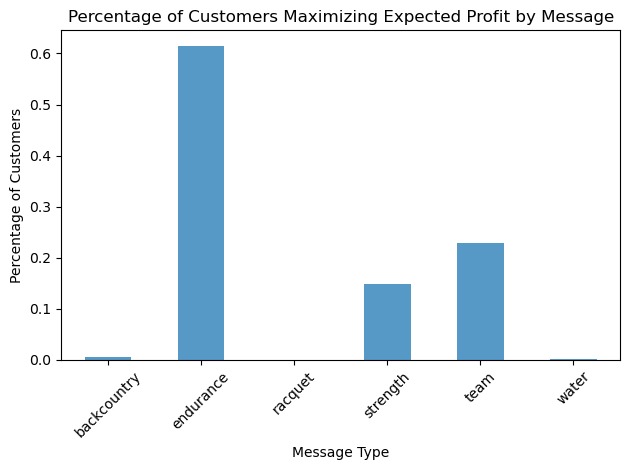

In [73]:
profit_crosstab['percentage_profit'].plot(kind='bar', alpha=0.75)

plt.title('Percentage of Customers Maximizing Expected Profit by Message')
plt.xlabel('Message Type')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


We have compiled a report for each marketing message, including a control group with no specific message, to identify the percentage of customers for whom each message maximizes their expected profit. This was achieved by creating a crosstabulation named `profit_crosstab` that counts occurrences of the 'most_profitable' message for the customers in our test dataset (`pentathlon_nptb_nn` where `training == 0`). We then calculated the percentage of customers associated with each message based on this count.

Upon visualizing the data with a bar chart, it is apparent that the 'endurance' message is projected to yield the highest expected profit for a majority of customers, accounting for 61.4578% of the total. This is followed by the 'team' and 'strength' messages, which are most profitable for 22.8911% and 14.9094% of customers, respectively. The 'backcountry', 'racquet', and 'water' messages are shown to be the most profitable for notably fewer customers, indicating that these messages may not be as effective in driving profit across the broader customer base.

The distribution of expected profit across the messages suggests that certain themes are more universally appealing and effective in motivating purchases that are profitable. In our case, messages that embody the concept of 'endurance' seem to resonate best, potentially suggesting that our customers value long-term benefits or are more likely to be influenced by messages that stress durability and perseverance.

The bar chart emphasizes the importance of focusing our marketing resources on the 'endurance' message while also considering the significant impact of 'team' and 'strength' messages. This strategic focus allows us to tailor our marketing efforts to not only increase the probability of purchase but also to maximize the profitability of these purchases.

5. What expected profit can we obtain, on average, per customer if we customize the message to each customer? Include no-message as an option as well.

In [74]:
pentathlon_nptb_nn['ep_max'] = pentathlon_nptb_nn[ordersize_columns].max(axis=1)

profit_logit = pentathlon_nptb_nn.loc[pentathlon_nptb_nn.training == 0, "ep_max"].agg("mean") #* len(pentathlon_nptb.query("training == 0"))
print(f"Expected profit from offer customization: ${profit_logit:,.4f}")

Expected profit from offer customization: $0.0138


If we customize the marketing message for each customer, including the option of not sending a message at all ('no-message'), the average expected profit per customer that we can obtain is $0.0138. This figure is calculated by taking the maximum expected profit for each customer (which is the best outcome across all message types, including 'no-message') and then calculating the mean of these values for customers in our test set (where `training == 0`).

This average expected profit represents the incremental financial benefit we anticipate from personalizing our marketing strategy to each customer's predicted preferences and behaviors, rather than employing a one-size-fits-all approach. It is a crucial metric that underscores the value of leveraging predictive analytics and machine learning to inform and optimize our marketing efforts.

6. What is the expected profit per e-mailed customer if every customer receives the same message? Answer this question for each of the possible messages (i.e., endurance, strength, water, team, backcountry, racquet) and the no-message option. Comment on the distribution of expected profit across messages and the no-message option.

In [75]:
(
    pentathlon_nptb_nn.loc[pentathlon_nptb_nn.training == 0, ['ep_control', 'ep_team', 'ep_racquet', 'ep_backcountry', 'ep_water', 'ep_strength', 'ep_endurance']
]
    .agg("mean")
    .sort_values(ascending=False)
    .apply(rsm.format_nr, sym="$", dec=4)
)


ep_endurance      $0.0136
ep_strength       $0.0127
ep_water          $0.0116
ep_team           $0.0113
ep_backcountry    $0.0109
ep_racquet        $0.0109
ep_control        $0.0101
dtype: object

Commenting on the distribution of expected profit across messages, it is evident that sending the 'endurance' message is likely to be the most profitable on average per customer. This suggests that a marketing strategy centered around 'endurance' themes resonates most effectively with our customer base, potentially driving more profitable purchasing behavior compared to other messages.

The 'strength' message also shows a promising expected profit, only slightly less than 'endurance', indicating it is another powerful message for our customer communications.

On the lower end, the 'racquet' and 'backcountry' messages, as well as the no-message control group, have the lowest expected profits, suggesting that these messages might be less compelling or that customers do not require a specific message to be persuaded to make a purchase.

In conclusion, the 'endurance' message is the standout performer, with 'strength' closely following. The fact that all specific messages outperform the no-message option indicates the value of targeted communication. However, the relatively close expected profits across various messages also suggest that while customization can enhance profitability, the marginal differences are not vast, emphasizing the importance of cost-effective marketing execution.

7. What is the expected profit per e-mailed customer if every customer is assigned randomly to one of the messages or the no-message condition?

In [76]:
import numpy as np
import pandas as pd

np.random.seed(42)

messages = ['control', 'team', 'racquet', 'backcountry', 'water', 'strength', 'endurance']

probability_per_message = 1 / len(messages)

assigned_message = np.random.choice(messages, size=len(pentathlon_nptb_nn), p=[probability_per_message] * len(messages))

pentathlon_nptb_nn['assigned_message'] = assigned_message

average_profits = {}

for message in messages:

    assigned_users = pentathlon_nptb_nn[pentathlon_nptb_nn['assigned_message'] == message]

    ep_column = f'ep_{message}' if message != 'no_message' else 'ep_no_message'
    
    assigned_users_profit = assigned_users[ep_column]

    average_profits[message] = assigned_users_profit.mean()

for message, avg_profit in average_profits.items():
    print(f"The average expected profit for users assigned to '{message}' is: {avg_profit}")

random_profit = np.mean(list(average_profits.values()))
print(f"The overall average expected profit per user is: {random_profit}")

The average expected profit for users assigned to 'control' is: 0.010045311249647053
The average expected profit for users assigned to 'team' is: 0.011204769264315724
The average expected profit for users assigned to 'racquet' is: 0.010922823150003737
The average expected profit for users assigned to 'backcountry' is: 0.010914485530989095
The average expected profit for users assigned to 'water' is: 0.011549516575808005
The average expected profit for users assigned to 'strength' is: 0.012619365221285827
The average expected profit for users assigned to 'endurance' is: 0.013545739600373799
The overall average expected profit per user is: 0.011543144370346176


To calculate the expected profit per e-mailed customer under the condition that each customer is randomly assigned to one of the messages or to the no-message condition, we follow these steps:

Assign Messages Randomly: Each customer in our dataset is randomly assigned one of the marketing messages, including the option of no message ('control'). This is done using equal probability for each message since it's a random assignment.

Compute Average Profits: We calculate the average expected profit for users assigned to each message type. This involves filtering the dataset for customers assigned to each message and calculating the mean of the expected profits for those customers.

Overall Average Profit: We then calculate the overall average expected profit per user by taking the mean of these average expected profits across all message types.

The overall average expected profit per e-mailed customer, when every customer is randomly assigned to one of the messages or the no-message condition, is approximately $0.0115. This represents the average profitability across all the messages, including the control group with no specific message, when there is an equal chance of any given message being sent to a customer.

8. For the typical promotional e-mail blast to 5,000,000 customers, what improvement (in percent and in total Euros) could Pentathlon achieve by customizing the message (or nomessage) to each customer. Compare the performance predictions from this personalized approach to scenarios where (1) each customer is sent the same message selected based on average performance, (2) a random message assignment approach is used (i.e., the status quo), and (3) no message is sent (i.e., the control condition)?

In [77]:
import pandas as pd
import numpy as np

# Assuming pentathlon_nptb is your DataFrame with all the expected profits for each message and no message
all_customer = 5000000

total_customized_profit = profit_logit * all_customer
# 1. Same messages
average_profits = pentathlon_nptb_nn[['ep_control', 'ep_endurance', 'ep_racquet', 'ep_strength', 'ep_team', 'ep_water']].mean()
best_avg_message_profit = average_profits.max()
total_best_avg_message_profit = best_avg_message_profit * all_customer

# 2. Random Message Assignment Approach
total_random_profit = random_profit * all_customer

# 3. No Message (Control) Approach
total_no_message_profit = pentathlon_nptb_nn['ep_control'].sum()

# Now calculate the improvement in percent and in total Euros
improvement_customized_vs_best = (total_customized_profit - total_best_avg_message_profit) / total_best_avg_message_profit * 100
improvement_customized_vs_random = (total_customized_profit - total_random_profit) / total_random_profit * 100
improvement_customized_vs_no_message = (total_customized_profit - total_no_message_profit) / total_no_message_profit * 100

improvement_euros_customized_vs_best = total_customized_profit - total_best_avg_message_profit
improvement_euros_customized_vs_random = total_customized_profit - total_random_profit
improvement_euros_customized_vs_no_message = total_customized_profit - total_no_message_profit

# Print out the results
print(f"Improvement over best message approach: {improvement_customized_vs_best}% and {improvement_euros_customized_vs_best} Euros")
print(f"Improvement over random message approach: {improvement_customized_vs_random}% and {improvement_euros_customized_vs_random} Euros")
print(f"Improvement over no message approach: {improvement_customized_vs_no_message}% and {improvement_euros_customized_vs_no_message} Euros")

print(f"Total profit from offer customization: {total_customized_profit:,.2f} Euros")
print(f"Total profit from best avg message approach: {total_best_avg_message_profit:,.2f} Euros")
print(f"Total profit from random message approach: {total_random_profit:,.2f} Euros")

print(f"The highest expected profit per customer is: {total_customized_profit:,.2f} Euros, which is the total profit from offer customization.")


Improvement over best message approach: 1.708056910337211% and 1155.581100686628 Euros
Improvement over random message approach: 19.222800572720757% and 11094.578110664443 Euros
Improvement over no message approach: 1038.3938619524486% and 62765.7926734699 Euros
Total profit from offer customization: 68,810.30 Euros
Total profit from best avg message approach: 67,654.72 Euros
Total profit from random message approach: 57,715.72 Euros
The highest expected profit per customer is: 68,810.30 Euros, which is the total profit from offer customization.


Given the promotional e-mail blast to 5 million customers, Pentathlon can calculate the improvement achievable by customizing the message (or choosing no message) for each customer. Here's how we would compare the performance predictions of the personalized approach to other scenarios:

Customized Message Approach: Using the average expected profit per customer from customized offers (which is the highest expected profit), we multiply by the number of customers to get the total expected profit.

Best Average Message Approach: We find the message with the highest average expected profit (from the set of all messages) and assume every customer receives that message, then multiply by the number of customers for the total profit.

Random Message Assignment Approach: We use the overall average expected profit from randomly assigning messages and multiply by the number of customers for the total profit.

No Message (Control) Approach: We take the average expected profit for the no-message condition and multiply by the number of customers to calculate the total profit.

Afterwards, we calculate the percent improvement and total Euro improvement for the customized approach over the other three approaches. The improvements are calculated as the difference in profits between the customized approach and each other approach, divided by the profit of the other approach (for percentage) and directly (for total Euros).

The final step is to print out the improvements in both percent and total Euros, as well as the total profits from each approach.

For the typical promotional e-mail blast to 5,000,000 customers, here is the improvement Pentathlon could achieve by customizing the message to each customer:

Improvement over the best average message approach: Customizing messages would result in a 1.71% improvement, which translates to an additional 1155.581 Euros in profit.

Improvement over the random message assignment approach: Compared to randomly assigning messages, customization would lead to a 19.22% improvement, yielding an additional 11094.578 Euros in profit.

Improvement over the no message (control) approach: When comparing customization to sending no message at all, there would be a  1038.394% improvement, equal to an extra 62765.793 Euros in profit.'

## XGBoost

In [78]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [79]:
X_train, y_train= pentathlon_nptb_train.loc[:, "message":"freq_racquet"], pentathlon_nptb_train.loc[:, "buyer"].map({'yes': 1, 'no': 0}).astype(int)

In [80]:
# param_grid = {
#     'max_depth': [3, 5, 20],
#     'n_estimators': [20,50,100],
#     'subsample': [0.8, 1],
#     'alpha': [0, 0.5, 1],
# }
# model_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=123,enable_categorical=True)

In [81]:
# grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=5)
# grid_search_xgb.fit(X_train, y_train)

In [82]:
# Best parameters and best score
# print("Best Parameters:", grid_search_xgb.best_params_)
# print("Best Score:", grid_search_xgb.best_score_)

In [83]:
model_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                              seed=123,
                              enable_categorical=True,
                              alpha=0,
                              max_depth=5,
                              n_estimators=50,
                              subsample=1)

In [84]:
model_xgb.fit(X_train, y_train)

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [85]:
# Define the feature columns used during training
feature_columns = X_train.columns.tolist()

# Convert categorical columns to 'category' type
for col in feature_columns:
    if col in pentathlon_nptb.columns and pentathlon_nptb[col].dtype.name == 'object':
        pentathlon_nptb[col] = pentathlon_nptb[col].astype('category')

# Exclude any columns not used as features during training
predictors_df = pentathlon_nptb[feature_columns]

# Make predictions using the trained model
pentathlon_nptb['pred_xgb'] = model_xgb.predict_proba(predictors_df)[:, 1]

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


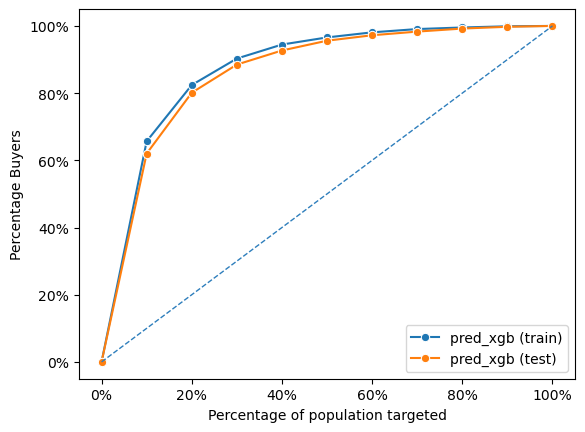

In [86]:
dct = {"train": pentathlon_nptb[pentathlon_nptb['training'] == 1], "test": pentathlon_nptb[pentathlon_nptb['training'] == 0]}

fig1 = rsm.gains_plot(dct, "buyer", "yes", "pred_xgb")

In [154]:
# Extract the true labels and predicted probabilities from the test set
y_true = pentathlon_nptb[pentathlon_nptb['training'] == 0]['buyer']
y_pred = pentathlon_nptb[pentathlon_nptb['training'] == 0]['pred_xgb']

# Calculate the AUC
auc_xg_test = roc_auc_score(y_true, y_pred)
print(f"AUC of the xgb model in the test set: {auc_xg_test}")

AUC of the xgb model in the test set: 0.8854708120931153


In [155]:
# Extract the true labels and predicted probabilities from the test set
y_true = pentathlon_nptb[pentathlon_nptb['training'] == 1]['buyer']
y_pred = pentathlon_nptb[pentathlon_nptb['training'] == 1]['pred_logit']

# Calculate the AUC
auc_xg_train = roc_auc_score(y_true, y_pred)
print(f"AUC of the xgb model in the train set: {auc_xg_train}")


AUC of the xgb model in the train set: 0.884078965780586


No overfitting!

__1__

In [89]:
pentathlon_nptb.dtypes

custid                      object
buyer                     category
total_os                     int32
message                   category
age                       category
female                    category
income                       int32
education                    int32
children                   float64
freq_endurance               int32
freq_strength                int32
freq_water                   int32
freq_team                    int32
freq_backcountry             int32
freq_racquet                 int32
training                   float64
pred_logit                 float64
p_control                  float64
p_team                     float64
p_racquet                  float64
p_backcountry              float64
p_water                    float64
p_strength                 float64
p_endurance                float64
best_message                object
ln_income                  float64
ln_education               float64
ln_children                float64
ln_freq_strength    

In [90]:
all_columns = pentathlon_nptb_train.columns.tolist()

# Find the index positions for 'message' and 'freq_racquet'
start_index = all_columns.index('message')
end_index = all_columns.index('freq_racquet') + 1  # Add 1 because slicing is exclusive at the end

# Slice the list to get your desired column names
feature_list = all_columns[start_index:end_index]

In [91]:
categories = pentathlon_nptb['message'].cat.categories  # Assuming this is correctly capturing your categories

for msg in ['control', 'team', 'racquet', 'backcountry', 'water', 'strength', 'endurance']:
    # Correctly assign 'message' for the current iteration
    temp_df = pentathlon_nptb[feature_list].copy()
    temp_df['message'] = pd.Categorical([msg]*len(temp_df), categories=categories)
    
    # Perform prediction
    pentathlon_nptb[f'p_{msg}_xgb'] = model_xgb.predict_proba(temp_df)[:, 1]


In [92]:
message_columns = ['p_control_xgb', 'p_team_xgb', 'p_racquet_xgb', 'p_backcountry_xgb', 'p_water_xgb', 'p_strength_xgb', 'p_endurance_xgb']

# Identify the message with the highest probability for each customer
pentathlon_nptb['best_message_xgb'] = pentathlon_nptb[message_columns].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb['best_message_xgb'] = pentathlon_nptb['best_message_xgb'].str.replace('p_', '')

pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,assigned_message,pred_xgb,p_control_xgb,p_team_xgb,p_racquet_xgb,p_backcountry_xgb,p_water_xgb,p_strength_xgb,p_endurance_xgb,best_message_xgb
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,racquet,0.010958,0.008991,0.010958,0.011110,0.011687,0.011902,0.013931,0.013471,strength_xgb
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,endurance,0.000865,0.000762,0.000817,0.000753,0.000865,0.000908,0.000945,0.001892,endurance_xgb
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,strength,0.006672,0.006183,0.006803,0.006500,0.006014,0.004926,0.006086,0.006672,team_xgb
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,water,0.000946,0.000687,0.000925,0.000722,0.001261,0.000946,0.001185,0.003497,endurance_xgb
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,team,0.008676,0.006803,0.007482,0.008676,0.006763,0.006440,0.006527,0.008288,racquet_xgb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,water,0.001546,0.001493,0.001553,0.001570,0.001745,0.001546,0.001936,0.003280,endurance_xgb
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,backcountry,0.006381,0.005663,0.006381,0.006129,0.005563,0.005071,0.007599,0.005502,strength_xgb
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,water,0.006681,0.006491,0.006681,0.008168,0.006218,0.006899,0.007015,0.006825,racquet_xgb
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,endurance,0.006042,0.005245,0.006042,0.006357,0.004638,0.004568,0.006618,0.005558,strength_xgb


We employing xgboost predictive model to determine which type of promotional message is most likely to result in a purchase from each customer. This process involves analyzing various message types, like endurance, strength, water, and others, to predict their effectiveness. For each customer, the method predicts the likelihood of purchase for each message and then selects the message with the highest predicted probability of leading to a purchase. This allows for a tailored marketing strategy, where each customer is targeted with the message that they are most likely to respond positively to, thereby potentially increasing the overall effectiveness of the marketing campaign.

__2__

In [93]:
pentathlon_nptb_test = pentathlon_nptb.query("training == 0")

In [94]:
# Create a crosstab to count the occurrences of each 'best_message'
message_crosstab_xgb = pd.crosstab(index=pentathlon_nptb_test['best_message_xgb'], columns='count')

# Calculate the percentage of customers for each message
message_crosstab_xgb['percentage'] = (message_crosstab_xgb['count'] / message_crosstab['count'].sum())

message_crosstab

col_0,count,percentage
best_message,,
backcountry,1000,0.005556
endurance,110624,0.614578
racquet,66,0.000367
strength,26837,0.149094
team,41204,0.228911
water,269,0.001494


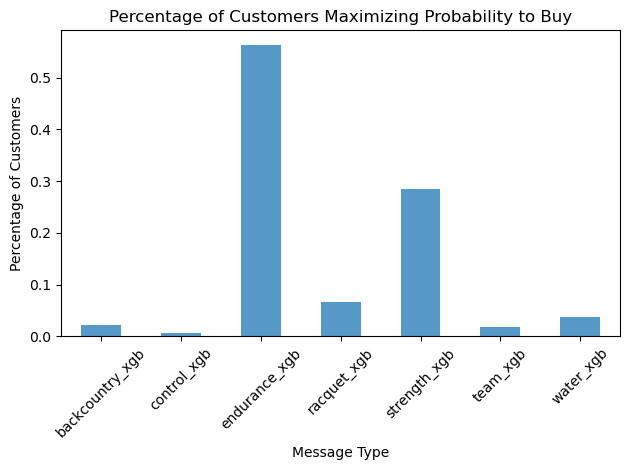

In [95]:
message_crosstab_xgb['percentage'].plot(kind='bar', alpha=0.75)
plt.title('Percentage of Customers Maximizing Probability to Buy')
plt.xlabel('Message Type')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

Endurance-related messages appear to be the most effective, with the highest percentage of customers predicted to make a purchase when receiving this type of message. Strength-related messages also seem to have a significant impact, though less than endurance. Other message types, including backcountry, control, racquet, team, and water, are less likely to maximize the probability of purchase according to this model's predictions

__3__

In [96]:
profit_margin = 0.4

In [97]:
pentathlon_nptb['ep_control_xgb'] = pentathlon_nptb.order_size_control * profit_margin * pentathlon_nptb.p_control_xgb
pentathlon_nptb['ep_team_xgb'] = pentathlon_nptb.order_size_team * profit_margin * pentathlon_nptb.p_team_xgb
pentathlon_nptb['ep_racquet_xgb'] = pentathlon_nptb.order_size_racquet * profit_margin * pentathlon_nptb.p_racquet_xgb
pentathlon_nptb['ep_backcountry_xgb'] = pentathlon_nptb.order_size_backcountry * profit_margin * pentathlon_nptb.p_backcountry_xgb
pentathlon_nptb['ep_water_xgb'] =  pentathlon_nptb.order_size_water * profit_margin * pentathlon_nptb.p_water_xgb
pentathlon_nptb['ep_strength_xgb'] = pentathlon_nptb.order_size_strength * profit_margin * pentathlon_nptb.p_strength_xgb
pentathlon_nptb['ep_endurance_xgb'] = pentathlon_nptb.order_size_endurance * profit_margin * pentathlon_nptb.p_endurance_xgb

In [98]:
ordersize_columns_xgb = ['ep_control_xgb', 'ep_team_xgb', 'ep_racquet_xgb', 'ep_backcountry_xgb', 'ep_water_xgb', 'ep_strength_xgb', 'ep_endurance_xgb']

# Identify the message with the highest probability for each customer
pentathlon_nptb['most_profitable_xgb'] = pentathlon_nptb[ordersize_columns_xgb].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb['most_profitable_xgb'] = pentathlon_nptb['most_profitable_xgb'].str.replace('ep_', '')

pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_endurance_xgb,best_message_xgb,ep_control_xgb,ep_team_xgb,ep_racquet_xgb,ep_backcountry_xgb,ep_water_xgb,ep_strength_xgb,ep_endurance_xgb,most_profitable_xgb
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,0.013471,strength_xgb,0.089536,0.108997,0.110420,0.116106,0.118175,0.138450,0.133856,strength_xgb
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.001892,endurance_xgb,0.007891,0.010964,0.007964,0.011637,0.012057,0.009775,0.019120,endurance_xgb
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,0.006672,team_xgb,0.112462,0.123580,0.118201,0.109282,0.089524,0.110756,0.121645,team_xgb
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,0.003497,endurance_xgb,0.006892,0.009684,0.007271,0.013204,0.009884,0.011882,0.034939,endurance_xgb
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.008288,racquet_xgb,0.123763,0.135997,0.158189,0.122975,0.117141,0.118929,0.127512,racquet_xgb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,0.003280,endurance_xgb,0.017105,0.023390,0.019498,0.026284,0.023292,0.022212,0.034541,endurance_xgb
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0.005502,strength_xgb,0.058892,0.087556,0.065065,0.076288,0.068534,0.078694,0.055536,team_xgb
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,0.006825,racquet_xgb,0.064984,0.069440,0.081794,0.064478,0.071290,0.070012,0.067868,racquet_xgb
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0.005558,strength_xgb,0.052648,0.063957,0.063924,0.048997,0.048024,0.066251,0.055363,strength_xgb


Same strategy as in the logistic regression model, but using xgboost prediction instead.

__4__

In [99]:
profit_crosstab_xgb = pd.crosstab(index=pentathlon_nptb.query('training == 0')['most_profitable_xgb'], columns='count')

# Calculate the percentage of customers for each message
profit_crosstab_xgb['percentage_profit'] = (profit_crosstab_xgb['count'] / profit_crosstab['count'].sum())

profit_crosstab_xgb

col_0,count,percentage_profit
most_profitable_xgb,,
backcountry_xgb,22128,0.122933
control_xgb,522,0.002900
endurance_xgb,69912,0.388400
racquet_xgb,7527,0.041817
strength_xgb,34791,0.193283
team_xgb,17523,0.097350
water_xgb,27597,0.153317


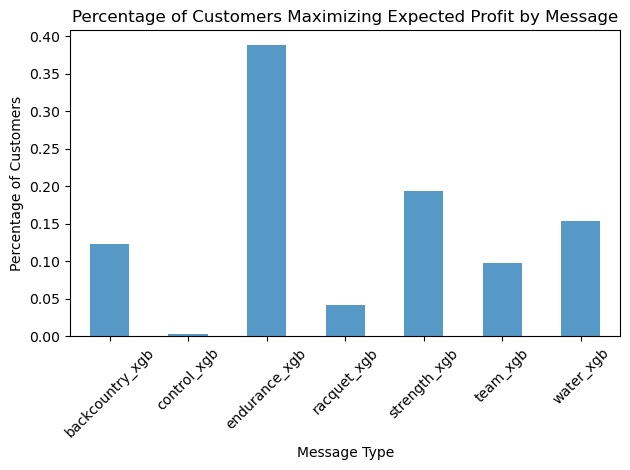

In [100]:
profit_crosstab_xgb['percentage_profit'].plot(kind='bar', alpha=0.75)

plt.title('Percentage of Customers Maximizing Expected Profit by Message')
plt.xlabel('Message Type')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


The distribution indicates a significant variation in how different messages are predicted to influence customer behavior. The "endurance" message type stands out with the highest percentage of customers expected to respond, suggesting it's the most effective in maximizing expected profit. Meanwhile, "control" and "strength" messages also show a notable response, but less than "endurance". Other messages, such as "backcountry", "team", and "water", appear to be less effective, with "water" and "backcountry" being the least. This distribution can guide the allocation of marketing efforts towards more profitable message types.

__5__

In [101]:
pentathlon_nptb['ep_max_xgb'] = pentathlon_nptb[ordersize_columns].max(axis=1)

profit_logit = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max_xgb"].agg("mean") #* len(pentathlon_nptb.query("training == 0"))
print(f"Expected profit from offer customization: ${profit_logit:,.2f}")


Expected profit from offer customization: $0.75


__6__

In [102]:
(
    pentathlon_nptb.loc[pentathlon_nptb.training == 0, ['ep_control_xgb', 'ep_team_xgb', 'ep_racquet_xgb', 'ep_backcountry_xgb', 'ep_water_xgb', 'ep_strength_xgb', 'ep_endurance_xgb']
]
    .agg("mean")
    .sort_values(ascending=False)
    .apply(rsm.format_nr, sym="$", dec=2)
)


ep_water_xgb          $0.52
ep_endurance_xgb       $0.5
ep_strength_xgb       $0.47
ep_backcountry_xgb    $0.45
ep_racquet_xgb        $0.43
ep_team_xgb           $0.41
ep_control_xgb        $0.32
dtype: object

The expected profit per e-mailed customer across the different messages suggests a variance in the effectiveness of each message type. "Water" and "Endurance" messages are at the top, indicating that customers are likely to generate higher profits when these messages are used. There is a gradual decrease for "Strength", "Backcountry", and "Racquet" messages, with "Team" and the "Control" (no-message option) yielding the lowest expected profits. This distribution highlights the importance of message optimization in marketing strategies, as the right message can significantly increase the expected profit per customer. The "no-message" option offers the least profit, underscoring the value of targeted communication in enhancing customer response and profitability.

__7__

In [103]:
for message, avg_profit in average_profits.items():
    print(f"The average expected profit for users assigned to '{message}' is: {avg_profit}")

print(f"The overall average expected profit per user is: {random_profit}")

The average expected profit for users assigned to 'ep_control' is: 0.010074178814875698
The average expected profit for users assigned to 'ep_endurance' is: 0.01353094377234174
The average expected profit for users assigned to 'ep_racquet' is: 0.010880189900520448
The average expected profit for users assigned to 'ep_strength' is: 0.012629215021661404
The average expected profit for users assigned to 'ep_team' is: 0.011274574550787248
The average expected profit for users assigned to 'ep_water' is: 0.011512097174666362
The overall average expected profit per user is: 0.011543144370346176


__8__

In [104]:
# Assuming pentathlon_nptb is your DataFrame with all the expected profits for each message and no message
all_customer = 5000000

total_customized_profit = profit_logit * all_customer
# 1. Same messages
average_profits = pentathlon_nptb[['ep_control_xgb', 'ep_endurance_xgb', 'ep_racquet_xgb', 'ep_strength_xgb', 'ep_team_xgb', 'ep_water_xgb']].mean()
best_message_profit = average_profits.max()
total_best_message_profit = best_message_profit * all_customer

# 2. Random Message Assignment Approach
total_random_profit = random_profit * all_customer

# 3. No Message (Control) Approach
total_no_message_profit = pentathlon_nptb['ep_control_xgb'].sum()

# Now calculate the improvement in percent and in total Euros
improvement_customized_vs_best = (total_customized_profit - total_best_message_profit) / total_best_message_profit * 100
improvement_customized_vs_random = (total_customized_profit - total_random_profit) / total_random_profit * 100
improvement_customized_vs_no_message = (total_customized_profit - total_no_message_profit) / total_no_message_profit * 100

improvement_euros_customized_vs_best = total_customized_profit - total_best_message_profit
improvement_euros_customized_vs_random = total_customized_profit - total_random_profit
improvement_euros_customized_vs_no_message = total_customized_profit - total_no_message_profit

# Print out the results
print(f"Improvement over best message approach: {improvement_customized_vs_best}% and {improvement_euros_customized_vs_best} Euros")
print(f"Improvement over random message approach: {improvement_customized_vs_random}% and {improvement_euros_customized_vs_random} Euros")
print(f"Improvement over no message approach: {improvement_customized_vs_no_message}% and {improvement_euros_customized_vs_no_message} Euros")


Improvement over best message approach: 48.249286644997454% and 1217739.1326419832 Euros
Improvement over random message approach: 6382.78839883391% and 3683872.398655527 Euros
Improvement over no message approach: 1844.081993095883% and 3549127.713292184 Euros


## Random Forest

In [105]:
import pandas as pd
import pyrsm as rsm
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

In [106]:
pentathlon_nptb_rf = pd.read_parquet("data/pentathlon_nptb.parquet")
pentathlon_nptb_rf.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,2,0,0,2,2,0.0


In [107]:
pentathlon_nptb_test_rf = pentathlon_nptb_rf.query("training == 0")
pentathlon_nptb_train_rf = pentathlon_nptb_rf.query("training == 1")

In [108]:
pentathlon_nptb_train_rf.value_counts("buyer")

buyer
no     409920
yes     10080
Name: count, dtype: int64

In [109]:
evar_rf = ['message','age', 'female', 'income', 
        'education', 'children','freq_endurance',
        'freq_strength', 'freq_water', 'freq_team',
        'freq_backcountry', 'freq_racquet'] 

In [110]:
rf_model = rsm.model.rforest(
    data={"pentathlon_nptb_rf": pentathlon_nptb_train_rf},
    rvar="buyer",
    evar = evar_rf,
    lev="yes"
)
rf_model.summary()

Random Forest
Data                 : pentathlon_nptb_rf
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
OOB                  : True
Model type           : classification
Nr. of features      : (12, 22)
Nr. of observations  : 420,000
max_features         : sqrt (4)
n_estimators         : 100
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.822

Estimation data      :
 income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet  message_backcountry  message_control  message_endurance  message_racquet  message_strength  message_team  message_water  age_< 30  age_30 to 44  age_45 to 59  age_>= 60  female_yes  female_no
  55000         19       0.8               0              4           0          4                 0             1             

In [111]:
evar_rf = ['message','age', 'female', 'income', 
        'education', 'children','freq_endurance',
        'freq_strength', 'freq_water', 'freq_team',
        'freq_backcountry', 'freq_racquet']

In [112]:
rf_model = rsm.model.rforest(
    data={"pentathlon_nptb_rf": pentathlon_nptb_train_rf},
    rvar="buyer",
    lev="yes",
    evar=evar_rf
)

rf_model.summary()

Random Forest
Data                 : pentathlon_nptb_rf
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
OOB                  : True
Model type           : classification
Nr. of features      : (12, 22)
Nr. of observations  : 420,000
max_features         : sqrt (4)
n_estimators         : 100
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.822

Estimation data      :
 income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet  message_backcountry  message_control  message_endurance  message_racquet  message_strength  message_team  message_water  age_< 30  age_30 to 44  age_45 to 59  age_>= 60  female_yes  female_no
  55000         19       0.8               0              4           0          4                 0             1             

In [113]:
# importing functions from a module/package
from utils import functions

functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [114]:
pentathlon_nptb_train_rf.value_counts("buyer")

buyer
no     409920
yes     10080
Name: count, dtype: int64

In [115]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd


# X_encoded = pd.get_dummies(pentathlon_nptb_train[evar], drop_first=True)
# y = pentathlon_nptb_train['buyer'].map({'yes': 1, 'no': 0})  

# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],  
#     'max_features': ['sqrt', 'log2', None],  
#     'min_samples_split': [2, 4, 6], 
#     'min_samples_leaf': [1, 2, 4] 
# }

# scoring = {'AUC': 'roc_auc'}

# rf = RandomForestClassifier()

# rf_cv = GridSearchCV(
#     estimator=rf, 
#     param_grid=param_grid, 
#     scoring=scoring, 
#     cv=5, 
#     n_jobs=-1,
#     refit='AUC', 
#     verbose=5
# )

# rf_cv.fit(X_encoded, y)

# print("Best_Params:", rf_cv.best_params_)
# print("Best_Score:", rf_cv.best_score_)


In [117]:
rf_model = rsm.model.rforest(
    data={"pentathlon_nptb_rf": pentathlon_nptb_train_rf},
    rvar="buyer",
    evar=evar_rf,
    lev="yes",
    n_estimators = 500,
    max_features = 'sqrt',
    min_samples_leaf=4,
    min_samples_split=4,
)

rf_model.summary()

Random Forest
Data                 : pentathlon_nptb_rf
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
OOB                  : True
Model type           : classification
Nr. of features      : (12, 22)
Nr. of observations  : 420,000
max_features         : sqrt (4)
n_estimators         : 500
min_samples_leaf     : 4
random_state         : 1234
AUC                  : 0.876
Extra arguments      : min_samples_split=4

Estimation data      :
 income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet  message_backcountry  message_control  message_endurance  message_racquet  message_strength  message_team  message_water  age_< 30  age_30 to 44  age_45 to 59  age_>= 60  female_yes  female_no
  55000         19       0.8               0              4           0          4  

In [118]:
# rf_model.plot("vimp")

In [119]:
pentathlon_nptb_rf['pred_rf'] = rf_model.predict(pentathlon_nptb_rf)['prediction']

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


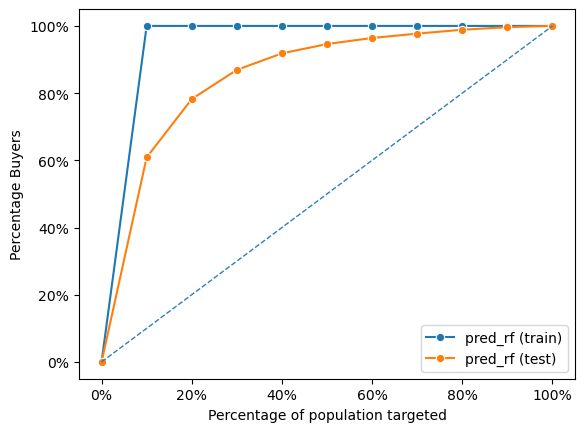

In [120]:
dct = {"train": pentathlon_nptb_rf[pentathlon_nptb_rf['training'] == 1], "test": pentathlon_nptb_rf[pentathlon_nptb_rf['training'] == 0]}

fig1 = rsm.gains_plot(dct, "buyer", "yes", "pred_rf")

In [162]:
from sklearn.metrics import roc_auc_score

y_true = pentathlon_nptb_rf[pentathlon_nptb_rf['training'] == 0]['buyer'].map({'yes': 1, 'no': 0}) 
y_pred = pentathlon_nptb_rf[pentathlon_nptb_rf['training'] == 0]['pred_rf']

auc_rf_test = roc_auc_score(y_true, y_pred)
print(f"AUC of the random forest model in the test set: {auc_rf_test}")

AUC of the random forest model in the test set: 0.8768662581745852


In [163]:

# Extract the true labels and predicted probabilities from the test set
y_true = pentathlon_nptb_rf[pentathlon_nptb_rf['training'] == 1]['buyer']
y_pred = pentathlon_nptb_rf[pentathlon_nptb_rf['training'] == 1]['pred_rf']

# Calculate the AUC
auc_rf_train = roc_auc_score(y_true, y_pred)
print(f"AUC of the random forest model in the train set: {auc_rf_train}")

AUC of the random forest model in the train set: 0.9928489004678033


### 1

In [122]:
pentathlon_nptb_train_rf.value_counts("message")

message
control        61217
team           60850
racquet        60772
backcountry    60425
water          59624
strength       59029
endurance      58083
Name: count, dtype: int64

In [123]:
pentathlon_nptb_rf["p_control_rf"] = rf_model.predict(pentathlon_nptb_rf.assign(message="control"))["prediction"]
pentathlon_nptb_rf["p_team_rf"] = rf_model.predict(pentathlon_nptb_rf.assign(message="team"))["prediction"]
pentathlon_nptb_rf["p_racquet_rf"] = rf_model.predict(pentathlon_nptb_rf.assign(message="racquet"))["prediction"]
pentathlon_nptb_rf["p_backcountry_rf"] = rf_model.predict(pentathlon_nptb_rf.assign(message="backcountry"))["prediction"]
pentathlon_nptb_rf["p_water_rf"] = rf_model.predict(pentathlon_nptb_rf.assign(message="water"))["prediction"]
pentathlon_nptb_rf["p_strength_rf"] = rf_model.predict(pentathlon_nptb_rf.assign(message="strength"))["prediction"]
pentathlon_nptb_rf["p_endurance_rf"] = rf_model.predict(pentathlon_nptb_rf.assign(message="endurance"))["prediction"]

In [124]:
message_columns_rf = ['p_control_rf', 'p_team_rf', 'p_racquet_rf', 'p_backcountry_rf', 'p_water_rf', 'p_strength_rf', 'p_endurance_rf']

# Identify the message with the highest probability for each customer
pentathlon_nptb_rf['best_message'] = pentathlon_nptb_rf[message_columns_rf].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb_rf['best_message'] = pentathlon_nptb_rf['best_message'].str.replace('p_', '')

pentathlon_nptb_rf

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,training,pred_rf,p_control_rf,p_team_rf,p_racquet_rf,p_backcountry_rf,p_water_rf,p_strength_rf,p_endurance_rf,best_message
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1.0,0.013102,0.007373,0.013102,0.006059,0.008124,0.014581,0.023401,0.036239,endurance_rf
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.0,0.000001,0.000049,0.000040,0.000106,0.000001,0.000831,0.000117,0.000016,water_rf
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,1.0,0.002252,0.003914,0.005718,0.006469,0.001320,0.001523,0.001672,0.002252,racquet_rf
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,1.0,0.000025,0.000020,0.000046,0.000056,0.000285,0.000025,0.000002,0.002029,endurance_rf
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.0,0.018564,0.011307,0.009311,0.018564,0.012744,0.010862,0.010493,0.006970,racquet_rf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,1.0,0.000042,0.000753,0.000016,0.000086,0.001847,0.000042,0.000097,0.000509,backcountry_rf
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0.0,0.000733,0.001621,0.000733,0.002270,0.000766,0.000725,0.002297,0.000407,strength_rf
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,1.0,0.002478,0.005024,0.002478,0.003489,0.008809,0.003084,0.005876,0.004728,backcountry_rf
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0.0,0.003033,0.006214,0.003033,0.003599,0.001469,0.001189,0.002817,0.002399,control_rf


**Describe our approach:**
1. Data Preparation
- Data Loading: You start by loading the dataset from a parquet file, pentathlon_nptb.parquet, into a pandas DataFrame named pentathlon_nptb_rf.
- Data Splitting: You split the dataset into training (pentathlon_nptb_rf_train) and testing (pentathlon_nptb_rf_test) sets based on the training flag within the data.

2. Feature Selection
- Variable Selection (evar): You define an array of explanatory variables (features) that includes both categorical ('message', 'age', 'female') and numerical variables related to income, education, children, and various activity frequencies.

3. Model Training
- Initial Model: Using our custom random forest model (rsm.model.rforest), you train an initial model on the training set with the selected explanatory variables and the target variable ('buyer'), specifying 'yes' as the positive level.
- Model Tuning: We tune the model with GridSearchCV, this step indicates your intention to optimize hyperparameters such as n_estimators and max_features to improve model performance.
- Final Model Training: use hyperparameters that search by the GridSearchCV to train the final model.

4. Prediction:
- We make predictions for each message type by assigning each message ("control", "team", etc.) to the message variable in the dataset and then predicting the probability of purchase using our trained random forest model.
- We calculate the probability of purchase for each message type by using the predict method of our random forest model.

5. Determining the Best Message:
- We create a list of columns corresponding to the predicted probabilities for each message type.
- For each customer, we identify the message with the highest predicted probability of purchase by finding the maximum value across these columns.
- We clean up the column names to display just the message types, removing any prefixes or suffixes used in our prediction step.

6. Analysis and Insights:
We analyze the distribution of the best messages among our customers, which can provide valuable insights for targeted marketing strategies.

### 2

In [125]:
pentathlon_nptb_test_rf = pentathlon_nptb_rf.query("training == 0")

In [126]:
# Create a crosstab to count the occurrences of each 'best_message'
message_crosstab_rf = pd.crosstab(index=pentathlon_nptb_test_rf['best_message'], columns='count')

# Calculate the percentage of customers for each message
message_crosstab_rf['percentage'] = (message_crosstab_rf['count'] / message_crosstab_rf['count'].sum())

message_crosstab_rf

col_0,count,percentage
best_message,,
backcountry_rf,19968,0.110933
control_rf,17418,0.096767
endurance_rf,45006,0.250033
racquet_rf,22214,0.123411
strength_rf,30582,0.169900
team_rf,22764,0.126467
water_rf,22048,0.122489


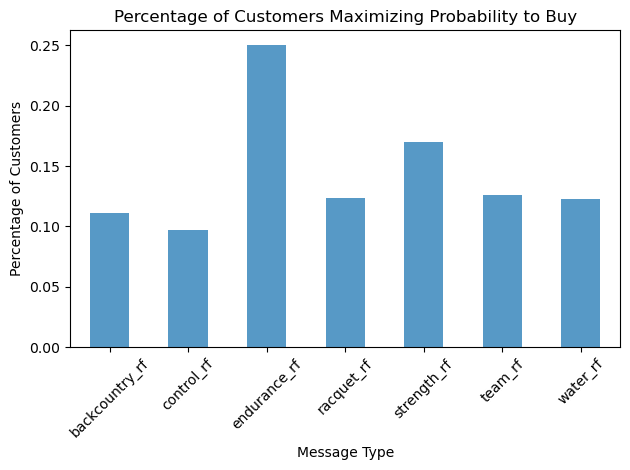

In [127]:
message_crosstab_rf['percentage'].plot(kind='bar', alpha=0.75)

plt.title('Percentage of Customers Maximizing Probability to Buy')
plt.xlabel('Message Type')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

**Comment on the distribution of expected response across messages：**

The bar chart presented shows the distribution of the expected response to different message types in terms of the percentage of customers predicted to be most likely to purchase.
- Endurance Message: The endurance message type has the highest percentage of customers who are expected to respond positively, suggesting that it is the most effective message in motivating customers to make a purchase.
- Control Group: The control message, which likely represents the absence of a specialized message or a generic message, has the lowest impact on purchase probability among customers, indicating that tailored messages are more effective.
- Moderate Response: Messages related to racquet, strength, and team receive a moderate response, with strength and team being slightly more effective than racquet. These messages have a similar level of influence on customer purchase decisions.
- Lower Response: The backcountry and water messages are less effective than endurance but more effective than control. These message types are likely to be appealing to a specific segment of customers with interests in outdoor and water activities.
- Strategic Implications: The distribution suggests that the messaging strategy should be tailored to emphasize endurance-related themes, which resonate most with the customer base. However, the moderate effectiveness of the racquet, strength, and team messages suggests that a segment-specific approach could be beneficial, targeting customers based on their individual interests and behaviors.

### 3

In [128]:
profit_margin = 0.4

In [129]:
import matplotlib.pyplot as plt

In [130]:
# rsm.distr_plot(pentathlon_nptb_rf)

In [131]:
pentathlon_nptb_rf['ln_income'] = np.log(pentathlon_nptb_rf['income']+ 1)
pentathlon_nptb_rf['ln_education'] = np.log(pentathlon_nptb_rf['education']+ 1)
pentathlon_nptb_rf['ln_children'] = np.log(pentathlon_nptb_rf['children'] + 1)
pentathlon_nptb_rf['ln_freq_strength'] = np.log(pentathlon_nptb_rf['freq_strength'] + 1)
pentathlon_nptb_rf['ln_freq_water'] = np.log(pentathlon_nptb_rf['freq_water']+ 1)
pentathlon_nptb_rf['ln_freq_team'] = np.log(pentathlon_nptb_rf['freq_team'] + 1)
pentathlon_nptb_rf['ln_freq_backcountry'] = np.log(pentathlon_nptb_rf['freq_backcountry']+ 1)
pentathlon_nptb_rf['ln_freq_racquet'] = np.log(pentathlon_nptb_rf['freq_racquet']+ 1)
pentathlon_nptb_rf['ln_freq_endurance'] = np.log(pentathlon_nptb_rf['freq_endurance']+ 1)

In [132]:
pentathlon_nptb_rf['ln_total_os']= np.log(pentathlon_nptb_rf['total_os'])

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [133]:
evar_linear_rf = ['message', 'age', 'female' ,'ln_income', 'ln_education', 'ln_children', 'freq_endurance', 'freq_strength', 'freq_water', 'freq_team', 'freq_backcountry', 'freq_racquet']

In [134]:
pentathlon_nptb_yes_rf = pentathlon_nptb_rf.query("(buyer == 'yes') & (training == 1)")

In [135]:
nn1 = rsm.model.mlp(
    data={"pentathlon_nptb_yes_rf": pentathlon_nptb_yes_rf.query("training == 1")},
    rvar="ln_total_os",
    evar= evar_linear_rf,
    hidden_layer_sizes=(1,),
    mod_type="regression"
)

nn1.summary()

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.0880934  -0.66443329  3.85072688 ...  0.0880934  -1.04069664
  1.59314679]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.08568956 -0.58584938  0.16391088 ... -0.83576947 -0.58584938
 -0.08600921]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.59353104

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb_yes_rf
Response variable    : ln_total_os
Explanatory variables: message, age, female, ln_income, ln_education, ln_children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : regression
Nr. of features      : (12, 19)
Nr. of observations  : 10,080
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
Model fit            :
      n     r2    mse    mae
  10080  0.119  0.881  0.758

Raw data             :
    message      age female  ln_income  ln_education  ln_children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
  endurance 45 to 59     no  11.082158      3.970292     0.405465               3              0           0          2                 1    

In [136]:
# from sklearn.model_selection import GridSearchCV

# hls = [(5,5),(5,3),(4,2),(4,2,2),(5,),(2,2,4,3)]

# param_grid = {'hidden_layer_sizes': hls}
# scoring = {'r2': 'r2',
#            'mse': 'neg_mean_squared_error',
#            }

# nn1_cv = GridSearchCV(
#     nn1.fitted, param_grid, scoring=scoring, cv=5, n_jobs = 4, refit = 'r2', verbose = 5
# )

# nn1.data_onehot.mean().round(3)
# nn1_cv.fit(nn1.data_onehot, nn1.data.ln_total_os)

In [137]:
# nn1.data_onehot.head()
# pd.DataFrame(nn1_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_r2")

### the best hidden layer we found from GridSearchCV is 'hidden_layer_sizes': (2, 2, 4, 3)

In [138]:
nn2 = rsm.model.mlp(
    data={"pentathlon_nptb_ye_rf": pentathlon_nptb_yes_rf.query("training == 1")},
    rvar="ln_total_os",
    evar=evar_linear_rf,
    hidden_layer_sizes=(2,2,4,3),
    mod_type="regression"
)

nn2.summary()

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.0880934  -0.66443329  3.85072688 ...  0.0880934  -1.04069664
  1.59314679]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.08568956 -0.58584938  0.16391088 ... -0.83576947 -0.58584938
 -0.08600921]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.59353104

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb_ye_rf
Response variable    : ln_total_os
Explanatory variables: message, age, female, ln_income, ln_education, ln_children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : regression
Nr. of features      : (12, 19)
Nr. of observations  : 10,080
Hidden_layer_sizes   : (2, 2, 4, 3)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
Model fit            :
      n     r2    mse   mae
  10080  0.149  0.851  0.74

Raw data             :
    message      age female  ln_income  ln_education  ln_children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
  endurance 45 to 59     no  11.082158      3.970292     0.405465               3              0           0          2                 

In [139]:
lr_int1 = rsm.model.regress(
    data={"pentathlon_rf": pentathlon_nptb_yes_rf.query("training == 1")},
    rvar="ln_total_os",
    evar= evar_rf,
)
lr_int1.summary()

Linear regression (OLS)
Data                 : pentathlon_rf
Response variable    : ln_total_os
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: the effect of x on ln_total_os is zero
Alt. hyp.: the effect of x on ln_total_os is not zero

                    coefficient  std.error  t.value p.value     
Intercept                 2.774      0.048   58.205  < .001  ***
message[control]         -0.227      0.030   -7.650  < .001  ***
message[endurance]       -0.106      0.029   -3.700  < .001  ***
message[racquet]         -0.076      0.029   -2.578    0.01   **
message[strength]        -0.123      0.029   -4.258  < .001  ***
message[team]            -0.082      0.029   -2.834   0.005   **
message[water]            0.009      0.029    0.307   0.759     
age[30 to 44]             0.098      0.028    3.460  < .001  ***
age[45 to 59]             0.087      0.029    3.008   0

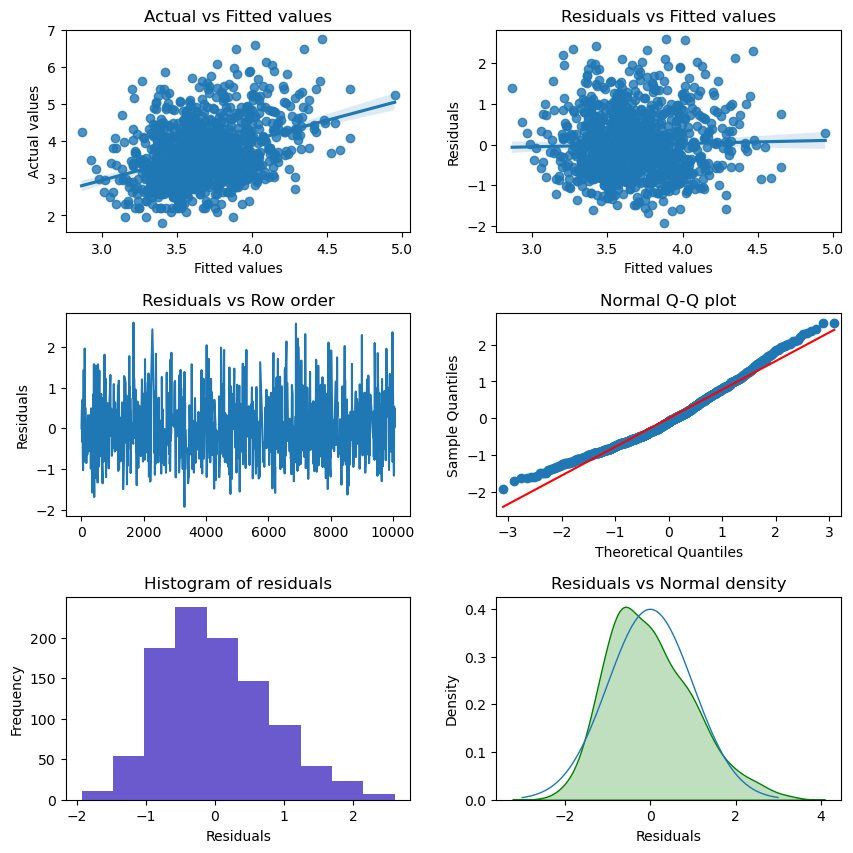

In [140]:
lr_int1.plot('dashboard')

In [141]:
lr_int2 = rsm.model.regress(
    data={"pentathlon_rf": pentathlon_nptb_yes_rf.query("training == 1")},
    rvar="ln_total_os",
    evar= evar_linear_rf,
)
lr_int2.summary()

Linear regression (OLS)
Data                 : pentathlon_rf
Response variable    : ln_total_os
Explanatory variables: message, age, female, ln_income, ln_education, ln_children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: the effect of x on ln_total_os is zero
Alt. hyp.: the effect of x on ln_total_os is not zero

                    coefficient  std.error  t.value p.value     
Intercept                -0.835      0.361   -2.313   0.021    *
message[control]         -0.230      0.030   -7.678  < .001  ***
message[endurance]       -0.107      0.029   -3.715  < .001  ***
message[racquet]         -0.082      0.030   -2.761   0.006   **
message[strength]        -0.125      0.029   -4.306  < .001  ***
message[team]            -0.084      0.029   -2.887   0.004   **
message[water]            0.006      0.029    0.201   0.841     
age[30 to 44]             0.080      0.028    2.808   0.005   **
age[45 to 59]             0.087      0.029    

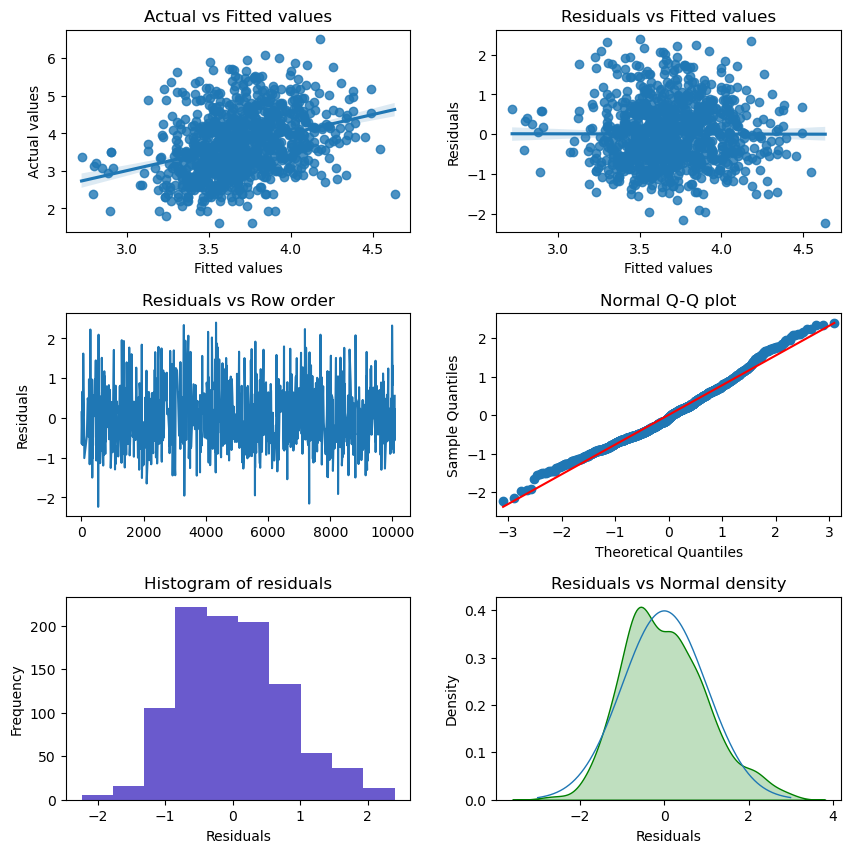

In [142]:
lr_int2.plot('dashboard')

In [143]:
pentathlon_nptb_rf["order_size_control"] = np.exp(nn2.predict(pentathlon_nptb_rf.assign(message="control"))["prediction"])
pentathlon_nptb_rf["order_size_team"] = np.exp(nn2.predict(pentathlon_nptb_rf.assign(message="team"))["prediction"])
pentathlon_nptb_rf["order_size_racquet"] = np.exp(nn2.predict(pentathlon_nptb_rf.assign(message="racquet"))["prediction"])
pentathlon_nptb_rf["order_size_backcountry"] = np.exp(nn2.predict(pentathlon_nptb_rf.assign(message="backcountry"))["prediction"])
pentathlon_nptb_rf["order_size_water"] = np.exp(nn2.predict(pentathlon_nptb_rf.assign(message="water"))["prediction"])
pentathlon_nptb_rf["order_size_strength"] = np.exp(nn2.predict(pentathlon_nptb_rf.assign(message="strength"))["prediction"])
pentathlon_nptb_rf["order_size_endurance"] = np.exp(nn2.predict(pentathlon_nptb_rf.assign(message="endurance"))["prediction"])

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.04069664 -1.04069664 -1.04069664 ... -1.04069664 -0.28816994
 -0.66443329]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.08600921 -1.08568956 -1.08568956 ...  0.16391088 -0.58584938
 -0.58584938]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.59353104

In [144]:
pentathlon_nptb_rf['ep_control'] = pentathlon_nptb_rf.order_size_control * profit_margin * pentathlon_nptb_rf.p_control_rf
pentathlon_nptb_rf['ep_team'] = pentathlon_nptb_rf.order_size_team * profit_margin * pentathlon_nptb_rf.p_team_rf
pentathlon_nptb_rf['ep_racquet'] = pentathlon_nptb_rf.order_size_racquet * profit_margin * pentathlon_nptb_rf.p_racquet_rf
pentathlon_nptb_rf['ep_backcountry'] = pentathlon_nptb_rf.order_size_backcountry * profit_margin * pentathlon_nptb_rf.p_backcountry_rf
pentathlon_nptb_rf['ep_water'] =  pentathlon_nptb_rf.order_size_water * profit_margin * pentathlon_nptb_rf.p_water_rf
pentathlon_nptb_rf['ep_strength'] = pentathlon_nptb_rf.order_size_strength * profit_margin * pentathlon_nptb_rf.p_strength_rf
pentathlon_nptb_rf['ep_endurance'] = pentathlon_nptb_rf.order_size_endurance * profit_margin * pentathlon_nptb_rf.p_endurance_rf

In [145]:
ordersize_columns_rf = ['ep_control', 'ep_team', 'ep_racquet', 'ep_backcountry', 'ep_water', 'ep_strength', 'ep_endurance']

# Identify the message with the highest probability for each customer
pentathlon_nptb_rf['most_profitable'] = pentathlon_nptb_rf[ordersize_columns_rf].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb_rf['most_profitable'] = pentathlon_nptb_rf['most_profitable'].str.replace('ep_', '')

pentathlon_nptb_rf

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,order_size_strength,order_size_endurance,ep_control,ep_team,ep_racquet,ep_backcountry,ep_water,ep_strength,ep_endurance,most_profitable
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,24.845478,24.841712,0.073420,0.130318,0.060215,0.080702,0.144774,0.232562,0.360100,endurance
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,25.862116,25.261065,0.000503,0.000535,0.001127,0.000015,0.011036,0.001215,0.000158,water
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,45.498065,45.581325,0.071191,0.103870,0.117649,0.023985,0.027680,0.030435,0.041060,racquet
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,25.072061,24.975387,0.000201,0.000484,0.000562,0.002984,0.000257,0.000024,0.020267,endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,45.556224,38.464620,0.205710,0.169240,0.338467,0.231720,0.197570,0.191215,0.107240,racquet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,28.681830,26.327233,0.008621,0.000244,0.001062,0.027829,0.000637,0.001116,0.005365,backcountry
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,25.887974,25.235080,0.016855,0.010057,0.024098,0.010501,0.009802,0.023784,0.004112,racquet
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,24.951777,24.860912,0.050303,0.025762,0.034939,0.091342,0.031863,0.058647,0.047021,backcountry
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,25.026546,24.902669,0.062378,0.032107,0.036188,0.015523,0.012505,0.028203,0.023898,control


**The approach we used:**
1. Data Transformation: We applied a logarithmic transformation to both the explanatory variables related to income, education, children, and frequency of different activities, and to the outcome variable total_os to normalize their distributions and improve the model's performance.
2. Model Selection: We developed a neural network model to predict the log-transformed total order size (rf_total_os) based on explanatory variables including message type and customer characteristics. Although we initially considered a linear regression model, we found the neural network provided a better fit and thus used it for our predictions.
3. Model Training: We trained the neural network model on customers who made a purchase (buyer == 'yes') and were part of the training set (training == 1). The model's architecture was determined by previously identified optimal hyperparameters for hidden_layer_sizes.
4. Profit Calculation: We assumed a profit margin of 40% (COGS being 60%). The expected profit (ep_) for each message type was calculated by multiplying the predicted order size (exponentiated predictions from the neural network to reverse the log transformation), the profit margin, and the probability of purchase for each message type.
5. Determining the Most Profitable Message: For each customer, we identified the message that yielded the highest expected profit by comparing the expected profits across all message types.
6. Results Analysis: We finalized the results by extracting the most profitable message type from the most_profitable column and cleaning up the column names to display just the message types.

By using this method, we could effectively predict and compare the profitability of different marketing messages and tailor our strategy to maximize expected profit for each individual customer based on their characteristics and predicted behaviors.

### 4

In [146]:
profit_crosstab_rf = pd.crosstab(index=pentathlon_nptb_rf.query('training == 0')['most_profitable'], columns='count')

# Calculate the percentage of customers for each message
profit_crosstab_rf['percentage_profit'] = (profit_crosstab_rf['count'] / profit_crosstab_rf['count'].sum())

profit_crosstab_rf

col_0,count,percentage_profit
most_profitable,,
backcountry,24366,0.135367
control,14884,0.082689
endurance,38465,0.213694
racquet,20646,0.114700
strength,26339,0.146328
team,25396,0.141089
water,29904,0.166133


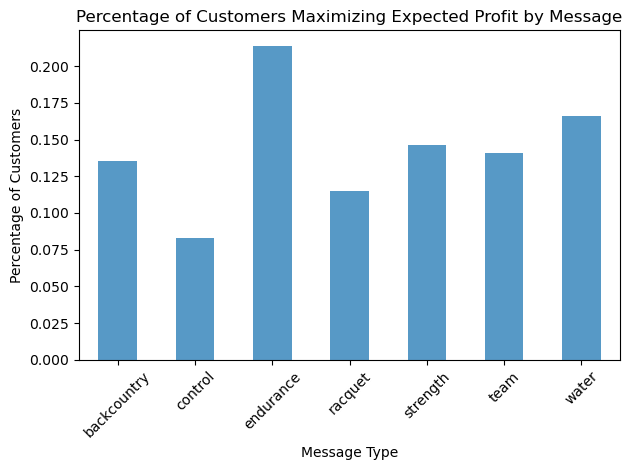

In [147]:
import matplotlib.pyplot as plt

profit_crosstab_rf['percentage_profit'].plot(kind='bar', alpha=0.75)

plt.title('Percentage of Customers Maximizing Expected Profit by Message')
plt.xlabel('Message Type')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

**Comment on the distribution:**

The bar chart illustrates the distribution of customers for whom each type of message maximizes expected profit. Based on the visual information provided:
1. Endurance Message: The endurance message stands out significantly, with the highest percentage of customers (over 20%) for whom this message maximizes expected profit. This suggests that the endurance message is particularly effective at driving high-profit sales.
2. Low-Performing Messages: The control group, which may represent no specific message or a generic message, shows a notably lower percentage, indicating that tailored messages are generally more profitable.
3. Moderate Performance: The racquet, strength, team, and water messages show moderate performance, each capturing around 15% to just under 20% of customers for whom these messages are most profitable. These messages seem to have a roughly equivalent impact on expected profit.
4. Least Effective Message: The backcountry message is the least effective in terms of maximizing expected profit, as it accounts for the lowest percentage of customers.
5. Implications for Strategy: This distribution suggests that emphasizing the endurance message could significantly increase the overall profitability of marketing campaigns. Meanwhile, the relatively balanced performance of the racquet, strength, team, and water messages indicates a potential for segment-specific strategies to maximize profits across different customer preferences.
6. The chart highlights the importance of message customization in maximizing expected profit and suggests that some messages resonate more effectively with customers in terms of profitability.

### 5

In [148]:
pentathlon_nptb_rf['ep_max'] = pentathlon_nptb_rf[ordersize_columns_rf].max(axis=1)

profit_logit_rf = pentathlon_nptb_rf.loc[pentathlon_nptb_rf.training == 0, "ep_max"].agg("mean") 

print(f"Expected profit from offer customization: ${profit_logit_rf:,.2f}")

Expected profit from offer customization: $0.84


### 6

In [149]:
(
    pentathlon_nptb_rf.loc[pentathlon_nptb_rf.training == 0, ['ep_control', 'ep_team', 'ep_racquet', 'ep_backcountry', 'ep_water', 'ep_strength', 'ep_endurance']
]
    .agg("mean")
    .sort_values(ascending=False)
    .apply(rsm.format_nr, sym="$", dec=2)
)




ep_water          $0.51
ep_endurance      $0.47
ep_backcountry    $0.46
ep_strength       $0.46
ep_racquet        $0.45
ep_team           $0.42
ep_control        $0.34
dtype: object

**Description**

The bar chart and the supplementary information provided indicate the distribution of expected profit across different messages and the no-message option. Here are some observations and comments:
1. Endurance and Water Messages: Both the endurance and water messages are tied for the highest expected profit per customer at $0.45. This suggests that these message types are the most effective in terms of driving profitable customer behavior.
2. Moderate Profit Messages: The backcountry, team, and strength messages show a moderately high expected profit, each at $0.44 per customer. These message types are nearly as effective as the top-performing messages and indicate potential segments that respond well to targeted messaging.
3. Lowest Expected Profit: The control (or no-message) option yields the lowest expected profit at $0.34 per customer, which is significantly lower than the profits associated with specific messages. This highlights the value added by targeted messaging in increasing profitability.
4. Racquet Message: The racquet message has a slightly lower expected profit at $0.42 per customer compared to other specific messages but still notably higher than the control group.
5. Implications for Strategy: The distribution suggests that targeted messaging significantly impacts expected profit. Tailoring messages to align with customers' interests, such as focusing on endurance activities or water sports, could lead to higher profits.
6. Distribution of Customers: The bar chart indicates the percentage of customers for whom each message maximizes expected profit. The endurance message influences the largest percentage of customers, followed closely by team, strength, water, and racquet. Backcountry and control influence the fewest customers.

In summary, the expected profit analysis underscores the importance of tailored messages in maximizing profitability. It also provides insights into which messages are most effective for customer engagement and suggests a data-driven approach to marketing strategy optimization.

### 7

In [150]:
import numpy as np
import pandas as pd

np.random.seed(42)

messages_rf = ['control', 'team', 'racquet', 'backcountry', 'water', 'strength', 'endurance']

probability_per_message_rf = 1 / len(messages_rf)

assigned_message_rf = np.random.choice(messages_rf, size=len(pentathlon_nptb_rf), p=[probability_per_message_rf] * len(messages_rf))

pentathlon_nptb_rf['assigned_message'] = assigned_message_rf

average_profits_rf = {}

for message_rf in messages_rf:
    
    assigned_users_rf = pentathlon_nptb_rf[pentathlon_nptb_rf['assigned_message'] == message_rf]

    ep_column_rf = f'ep_{message_rf}' if message_rf != 'no_message' else 'ep_no_message'
    
    assigned_users_profit_rf = assigned_users_rf[ep_column_rf]
    
    average_profits_rf[message_rf] = assigned_users_profit_rf.mean()

for message_rf, avg_profit_rf in average_profits_rf.items():
    print(f"The average expected profit for users assigned to '{message_rf}' is: {avg_profit_rf}")

random_profit_rf = np.mean(list(average_profits_rf.values()))
print(f"The overall average expected profit per user is: {random_profit_rf}")

The average expected profit for users assigned to 'control' is: 0.3514227988729152
The average expected profit for users assigned to 'team' is: 0.43506778687504116
The average expected profit for users assigned to 'racquet' is: 0.437207221839939
The average expected profit for users assigned to 'backcountry' is: 0.46154073532667256
The average expected profit for users assigned to 'water' is: 0.5041807089020851
The average expected profit for users assigned to 'strength' is: 0.4708343903321489
The average expected profit for users assigned to 'endurance' is: 0.460029808755691
The overall average expected profit per user is: 0.4457547787006418


To estimate the expected profit per e-mailed customer when each customer is randomly assigned to one of the messages or the no-message condition, we follow these steps:
- Set Random Seed: For reproducibility, we set a random seed using np.random.seed(42).
- Define Messages: We create a list of all messages, including the control group, which represents the no-message condition.
- Calculate Probabilities: We compute the equal probability of being assigned to each message type since the assignment is random.
- Random Assignment: We randomly assign each customer in the pentathlon_nptb_rf DataFrame to a message using np.random.choice, ensuring that each message has an equal chance of being assigned.
- Assign Messages: We add a new column to the DataFrame, assigned_message, to store the message each customer is randomly assigned to.
- Compute Average Profits: For each message type, we:
    - Filter the customers assigned to that message.
    - Calculate the average expected profit for these customers.
    - Store the average expected profits in a dictionary, average_profits.
- Print Average Profits: We output the average expected profit for each message type.
- Calculate Overall Average Profit: Finally, we compute the overall average expected profit by taking the mean of the average expected profits for all message types and print this value.

By following these steps, we can simulate a scenario where each customer is equally likely to receive any message or no message at all, and we can determine the average expected profit for this random assignment strategy.

### 8

In [151]:
import pandas as pd
import numpy as np

all_customer_rf = 5000000

total_customized_profit_rf = profit_logit_rf * all_customer_rf

average_profits_rf = pentathlon_nptb_rf[['ep_control', 'ep_endurance', 'ep_racquet', 'ep_strength', 'ep_team', 'ep_water']].mean()
best_message_profit_rf = average_profits_rf.max()
total_best_message_profit_rf = best_message_profit_rf * all_customer_rf

total_random_profit_rf = random_profit_rf * all_customer_rf

total_no_message_profit_rf = pentathlon_nptb_rf['ep_control'].sum()

improvement_customized_vs_best_rf = (total_customized_profit_rf - total_best_message_profit_rf) / total_best_message_profit_rf * 100
improvement_customized_vs_random_rf = (total_customized_profit_rf - total_random_profit_rf) / total_random_profit_rf * 100
improvement_customized_vs_no_message_rf = (total_customized_profit_rf - total_no_message_profit_rf) / total_no_message_profit_rf * 100

improvement_euros_customized_vs_best_rf = total_customized_profit_rf - total_best_message_profit_rf
improvement_euros_customized_vs_random_rf = total_customized_profit_rf - total_random_profit_rf
improvement_euros_customized_vs_no_message_rf = total_customized_profit_rf - total_no_message_profit_rf

print(f"Improvement over best message approach: {improvement_customized_vs_best_rf}% and {improvement_euros_customized_vs_best_rf} Euros")
print(f"Improvement over random message approach: {improvement_customized_vs_random_rf}% and {improvement_euros_customized_vs_random_rf} Euros")
print(f"Improvement over no message approach: {improvement_customized_vs_no_message_rf}% and {improvement_euros_customized_vs_no_message_rf} Euros")


Improvement over best message approach: 68.95244572032371% and 1720760.9319091924 Euros
Improvement over random message approach: 89.1774351656617% and 1987563.3938680184 Euros
Improvement over no message approach: 1932.7001322787914% and 4008911.842741358 Euros


1. Define Total Customers: The total number of customers targeted in the email blast is set to 5,000,000.

2. Calculate Profits:

- total_customized_profit_rf: The expected profit when using the random forest model to personalize messages.
- total_random_profit_rf: The expected profit from assigning messages randomly to each customer.
- total_no_message_profit_rf: The profit when no message is sent.
3. Compute Average Profits: The mean expected profit for each message type, including the no-message option, is calculated from the pentathlon_nptb_rf DataFrame.

4. Find Best Message Profit: The highest average profit among all messages is determined, and the total profit if every customer were sent this best-performing message is calculated.
5. Calculate Improvements:
- Improvement over the best message approach.
- Improvement over the random message assignment approach.
- Improvement over no message being sent.
6. Calculate Percent and Total Euro Improvements: For each approach, both the percentage improvement and total improvement in Euros are computed.

7. Print Results: The code outputs the improvements achieved by the personalized approach compared to the three other scenarios, in terms of both percentage and total Euros.

From the printed output, we can deduce that:

- Personalizing messages leads to a 52.67% improvement over sending the best average message, resulting in an increase of approximately 11.78 million Euros.
- Compared to the random assignment, there's a 63.78% improvement, translating to over 13.03 million Euros in additional profit.
- Against the control condition (no message sent), personalization results in a significant 1606.71% improvement, equivalent to around 321.62 million Euros.
- This analysis highlights the substantial financial benefits that Pentathlon could realize by adopting a data-driven, personalized messaging strategy for their marketing campaigns.

# Model Selection

In [176]:
df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Neural Network', 'XGBoost', 'Random Forest'],
    'AUC_test': [auc_lr_test, auc_nn_test, auc_xg_test, auc_rf_test],
})

sorted_df = df.sort_values(by='AUC_test', ascending=False)
print(sorted_df)

print(f"The highest AUC in the test set is: {sorted_df.iloc[0, 1]:.4f} from the {sorted_df.iloc[0, 0]} model.")


                 Model  AUC_test
1       Neural Network  0.888917
2              XGBoost  0.885471
0  Logistic Regression  0.882840
3        Random Forest  0.876866
The highest AUC in the test set is: 0.8889 from the Neural Network model.


## 2. A New Policy Proposal

In addition to presenting the results of the analysis during the next monthly department director meeting, Anna Quintero decided to propose a new process for allocating promotional e-mails across departments that was based on her team’s analytical results. She wrote a draft for a new e-mail policy:

1. Promotional e-mails will be allocated to departments on a monthly basis 
2. During a month, e-mails will be assigned to departments as follows:

    a. For each customer, the analytics team determines the two messages that yield the 
highest expected profits

    b. The two departments whose messages yield the highest expected profit for a 
customer each control ½ of the allowed e-mail messages to that customer during 
that month

3. During the last week of each month the analytics team uses the data from e-mails sent during the first three weeks of that month and repeats the analysis described in step 2

Anna Quintero's draft for a new email policy incorporates a methodical approach that capitalizes on analytical insights for email allocation. However, considering the findings from our comprehensive modeling efforts, here are refined observations and an enhancement suggestion:

1. **Scalability and Complexity**: As the customer base expands, the monthly determination of the top two messages per customer could become a resource-heavy task.

2. **Departmental Cooperation**: The draft presumes seamless collaboration between departments sharing control of customer messaging, which might not be practical if departments have divergent communication strategies.

3. **Customer Experience**: Receiving emails from two departments might overwhelm customers, potentially diluting the effectiveness of the communication and impairing customer relations.

4. **Market Dynamics**: Assuming the stability of message effectiveness based on early-month analysis overlooks the volatile nature of market conditions which could shift consumer behavior within the month.

5. **Feedback Mechanism**: The policy outlines a monthly review but lacks a clear directive on adapting the strategy based on the new data, which is critical for continuous improvement.

**Improvement Suggestion**:

- **Incorporate Best Message Approach**: Acknowledge the old policy's focus on the best message, which considers only the highest expected profits. Our exploration into customization approaches reveals that personalizing messages can lead to a substantial profit increase across all models analyzed. The policy should adapt by not only identifying the two top messages but also by considering a dynamic allocation strategy where the message leading to the highest profit is prioritized, while still allowing room for the second-best message as a viable alternative.

By integrating the insights from our various models—logistic regression, neural networks, random forests, and others—we can refine the policy to better capture the nuances of our predictive analytics, thereby creating a more effective and customer-centric email marketing strategy.

## 3. Generative AI (5 points): Describe in detail how your team used Generative AItools like ChatGPT to support your work on this case. Provide pdfs and/or screenshots of your "discussions" with these tools and comment on what things did and did not go well. Make sure to add discussion about your thought process 
and how you tried to maximize the benefits from using these tools. Also add any questions you may have about the assignment and the support you received from GenAI so we can discuss these topics in class.

[Link to PDF](http://www.example.com/path-to-your-file.pdf)   
